# Introduction

The primary objective of this Machine Learning application is to develop predictive models capable of accurately estimating oral temperatures measured in fast mode and monitor mode. The application will also classify individuals as either exhibiting fever or not, based on predefined temperature thresholds(≥37.5°C for both aveOralF and aveOralM measurements). 

# Data Exploration

## Loading the Dataset<sup>[2]</sup>

### Installing the ucimlrepo package

In [100]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


### Import the dataset into your code 

In [101]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
original_X = X = infrared_thermography_temperature.data.features 
original_y = y = infrared_thermography_temperature.data.targets 

### Concatenate Features and Targets Dataset

Concatenate features dataset with their corresponding values in the targets dataset to get full dataset that can later be used to gain insights in the dataset using statistics and visualizations.

In [102]:
thermo_data = pd.concat([X, y], axis=1)

### Understanding the Features and Their Descriptions

#### Display the first few rows of the dataset

In [103]:
thermo_data.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04


#### Display feature descriptions

The info() method can be used to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values

In [104]:
thermo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

There are 1020 instances in the dataset, but `Distance` attribute has only 1018 non-null values, 2 subject details are missing this feature.

All attributes are numerical, except for gender, age and ethnicity. Its type is object, so it could hold any kind of Python object. Since, their values are repetitive, they are the categorical attributes. We can use value_counts() function to see what categories exist and how many instance belong to each category.<sup>[3]</sup>

#### Gender

In [105]:
thermo_data['Gender'].value_counts()

Gender
Female    606
Male      414
Name: count, dtype: int64

#### Age

In [106]:
thermo_data['Age'].value_counts()

Age
18-20    534
21-25    355
26-30     67
31-40     31
51-60     11
21-30     10
41-50      9
>60        3
Name: count, dtype: int64

#### Ethnicity

In [107]:
thermo_data['Ethnicity'].value_counts()

Ethnicity
White                                506
Asian                                260
Black or African-American            143
Hispanic/Latino                       57
Multiracial                           50
American Indian or Alaskan Native      4
Name: count, dtype: int64

## Statistical Summary of the Dataset

In [108]:
thermo_data.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277,36.979216,37.028382
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316,0.386403,0.509502
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.750000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000,36.800000,36.777500
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000,36.900000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625,37.100000,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,39.600000,40.340000


## Visualizations

Histogram for each numerical attribute to get more insight in their distribution across the dataset.

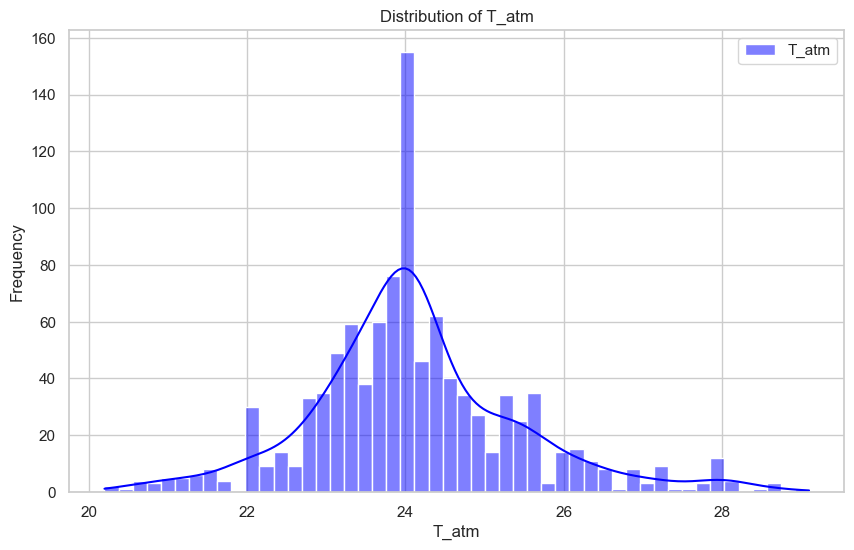

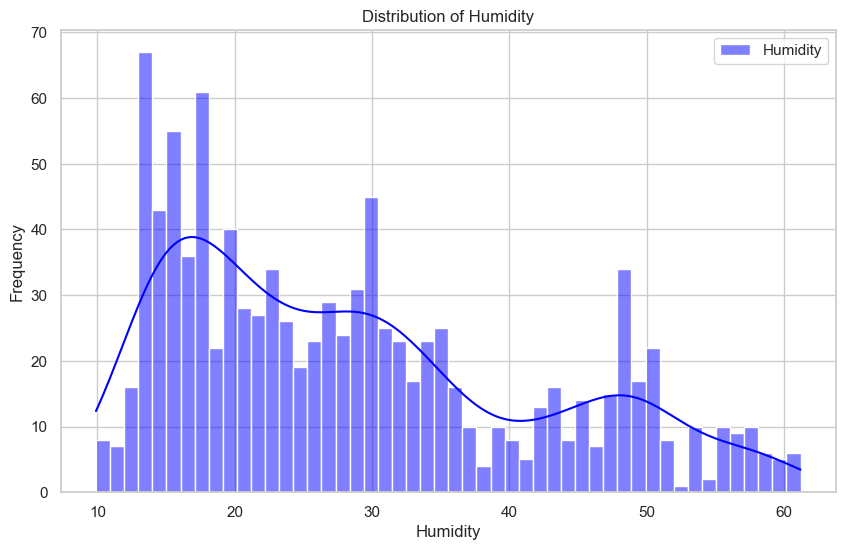

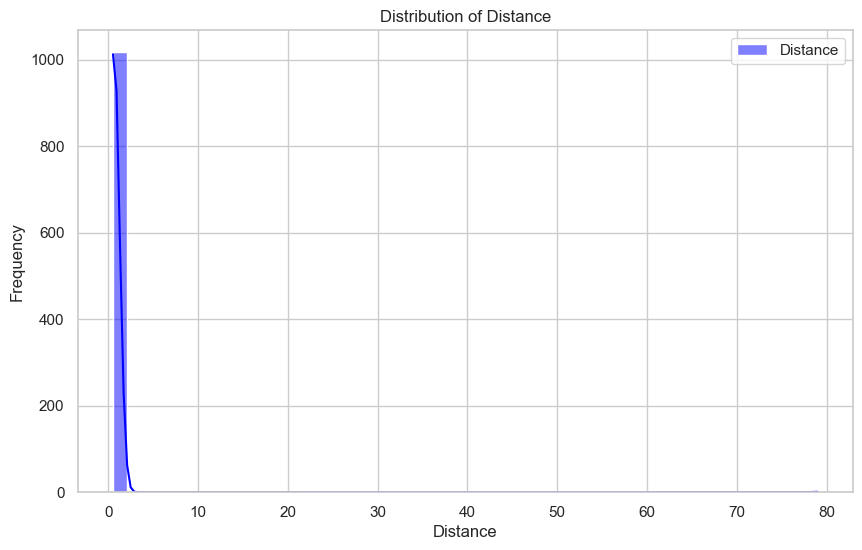

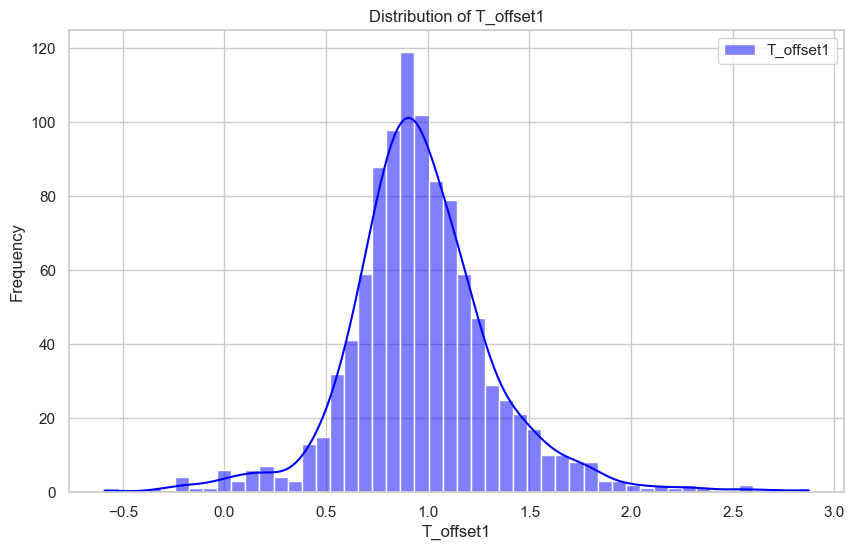

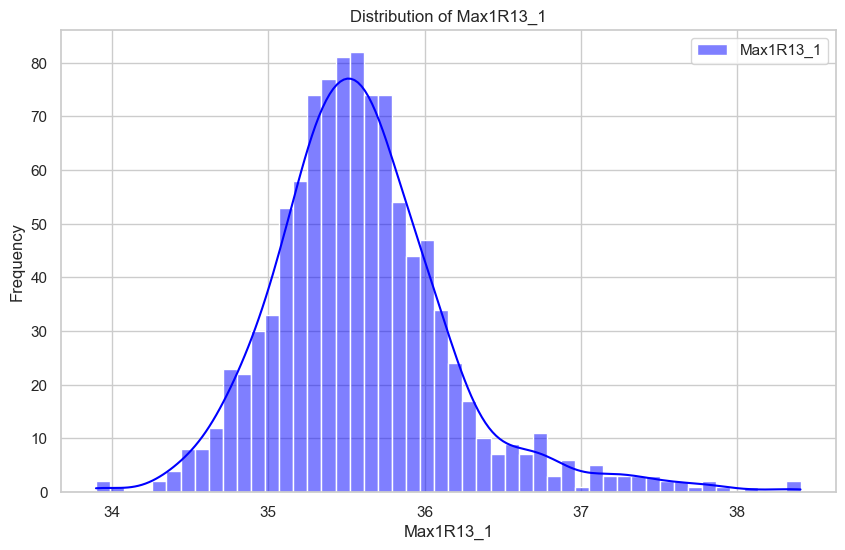

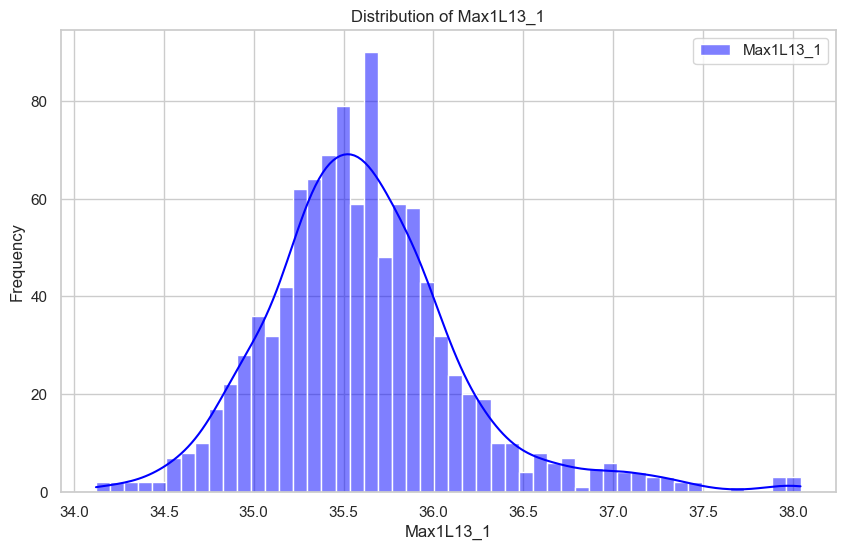

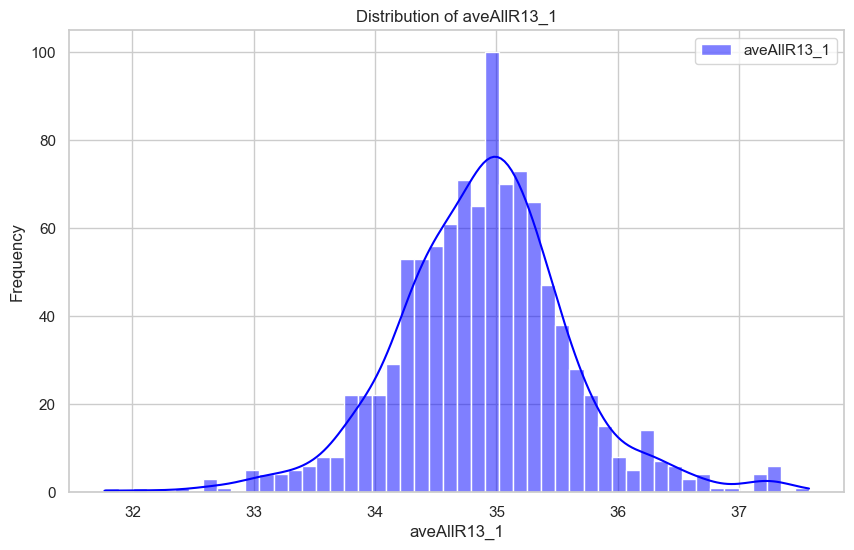

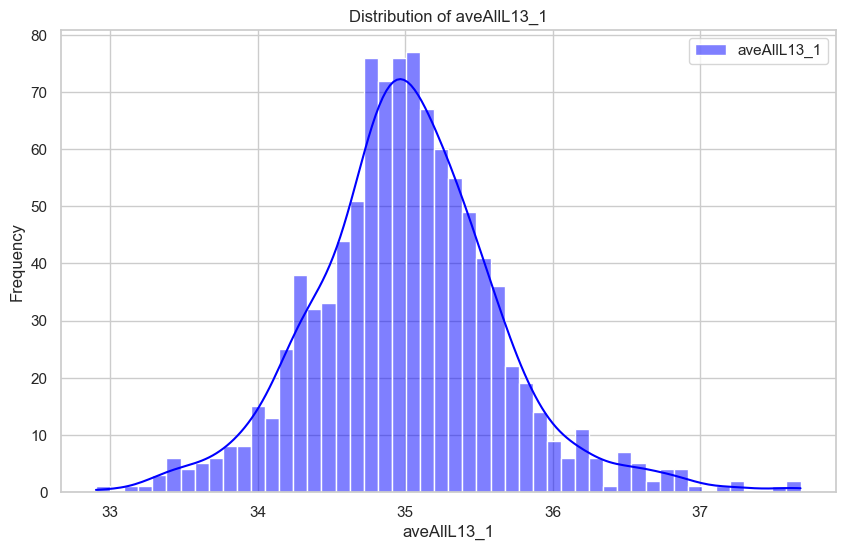

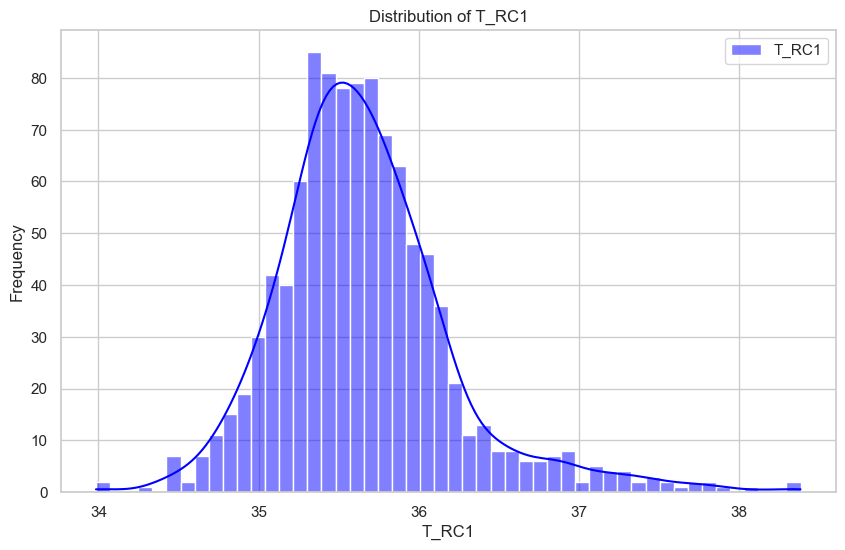

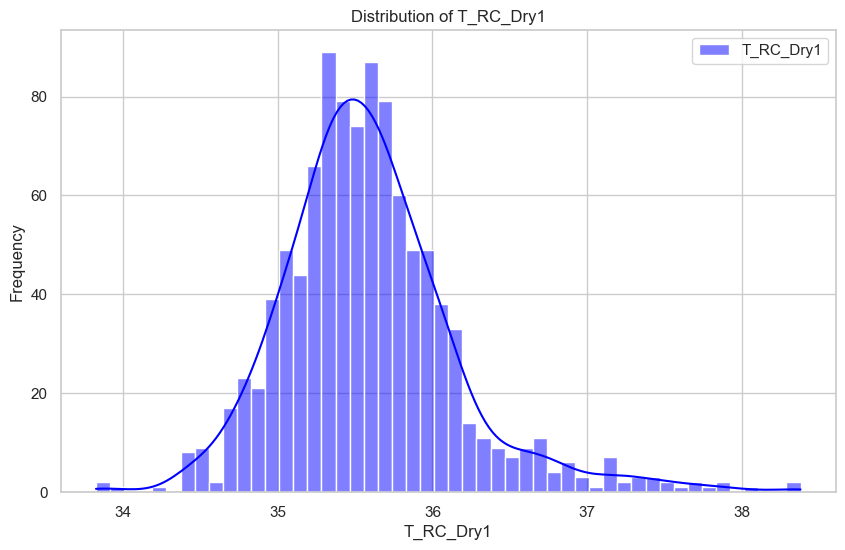

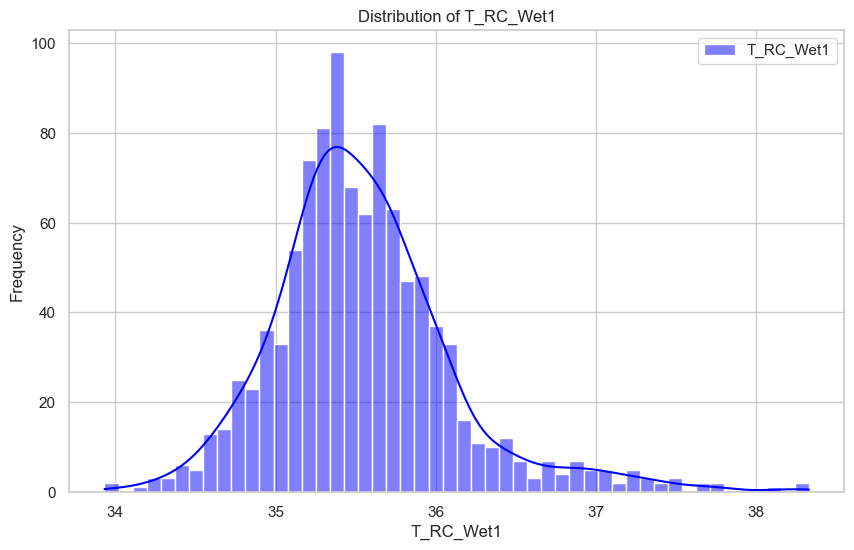

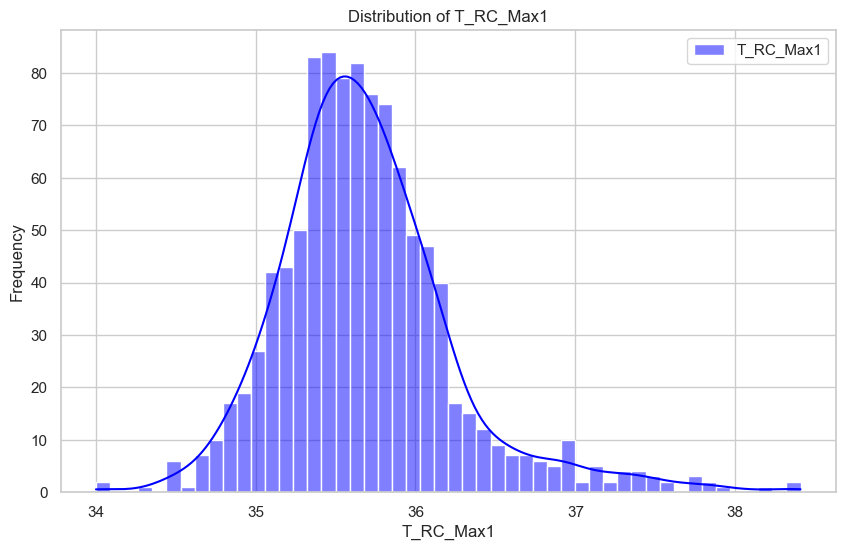

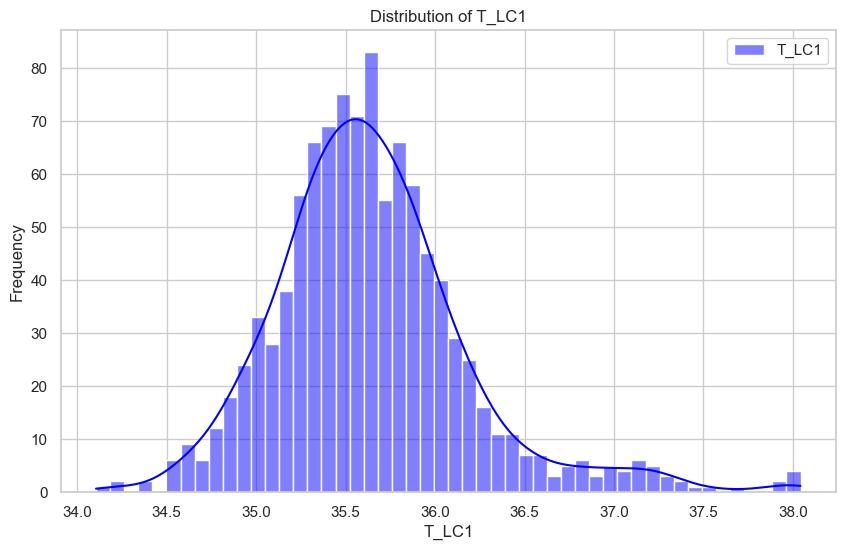

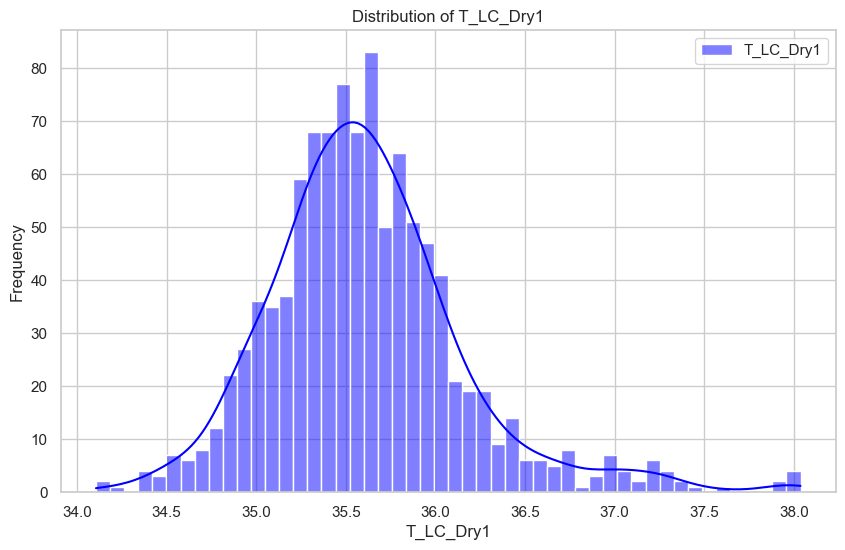

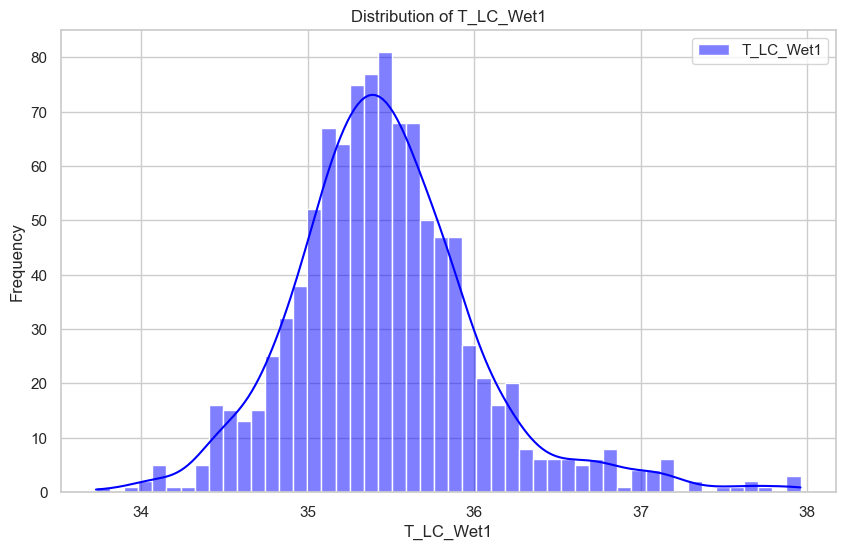

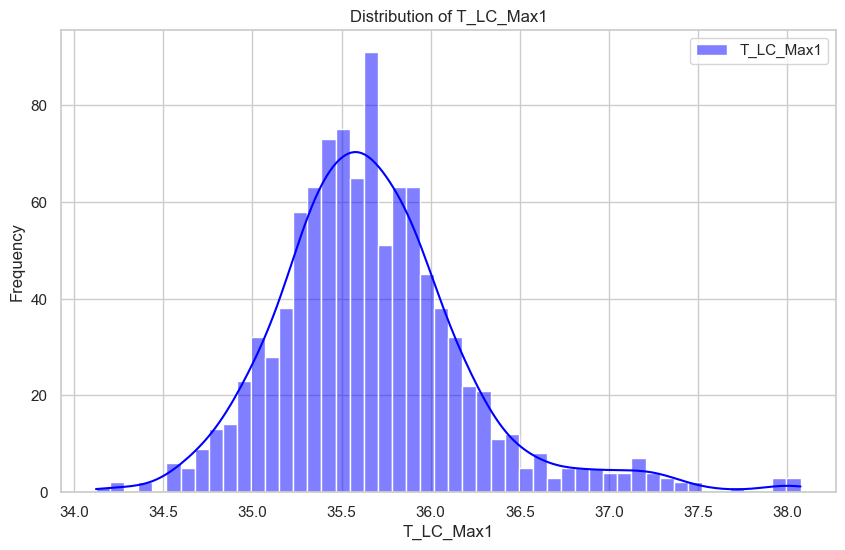

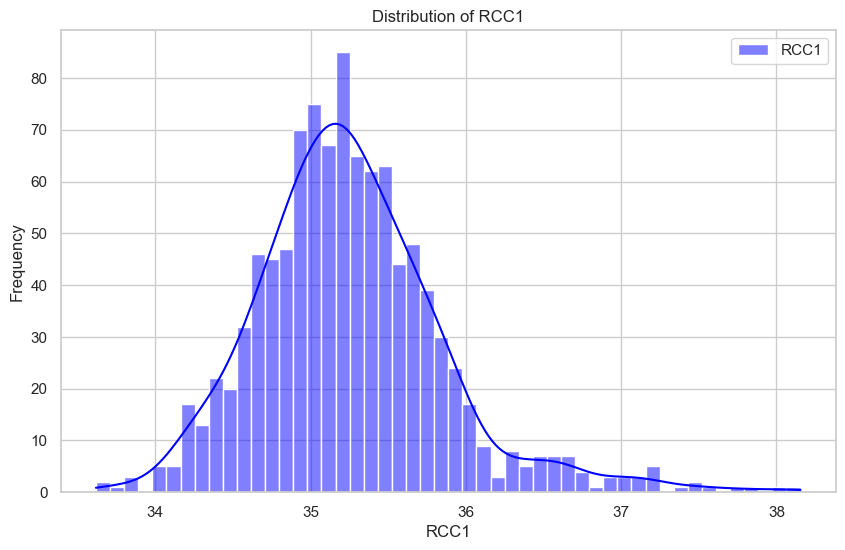

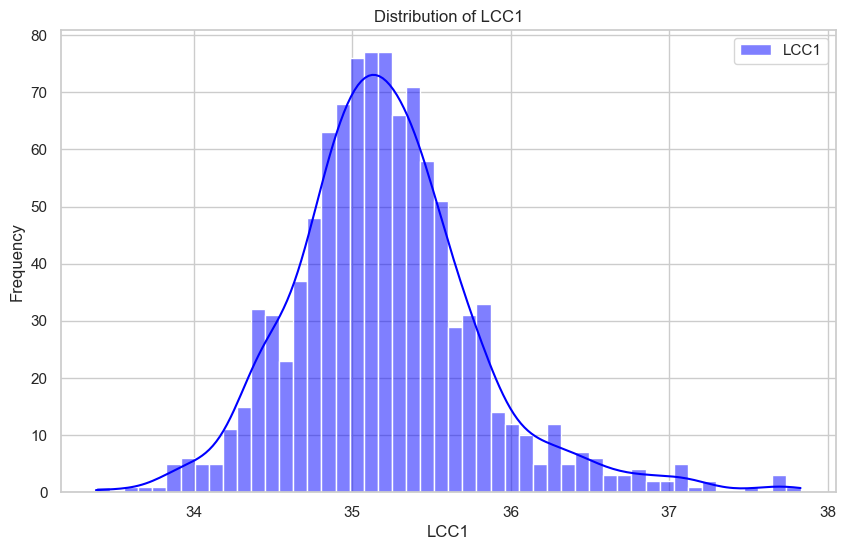

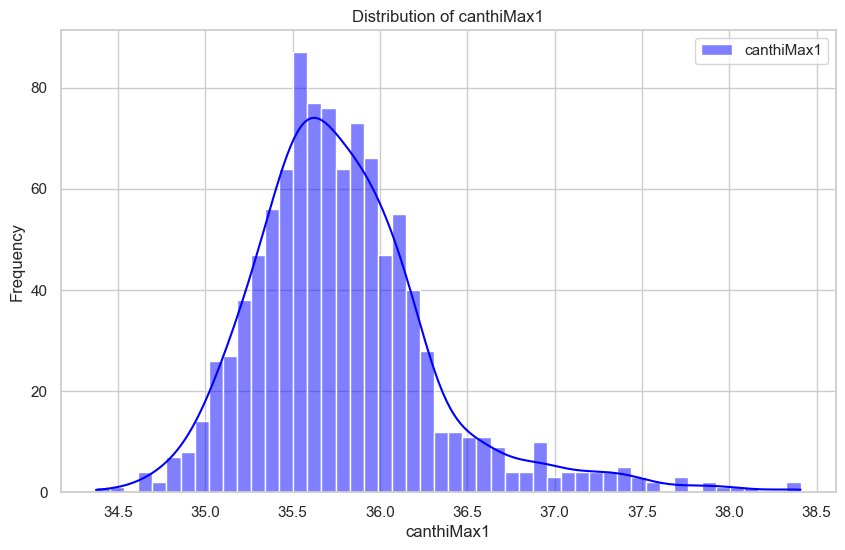

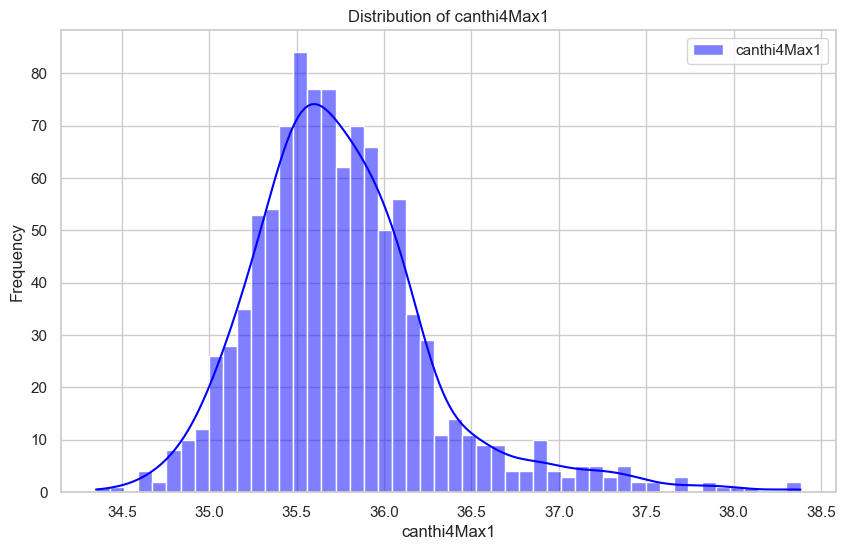

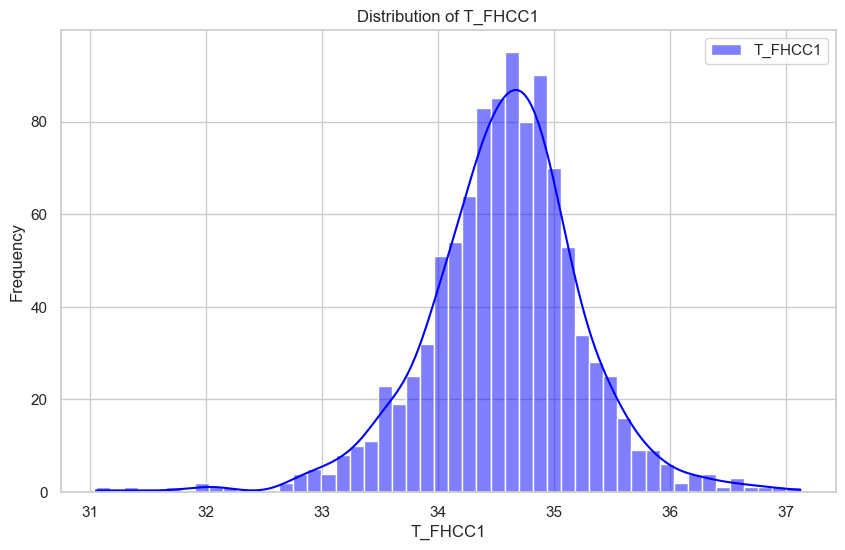

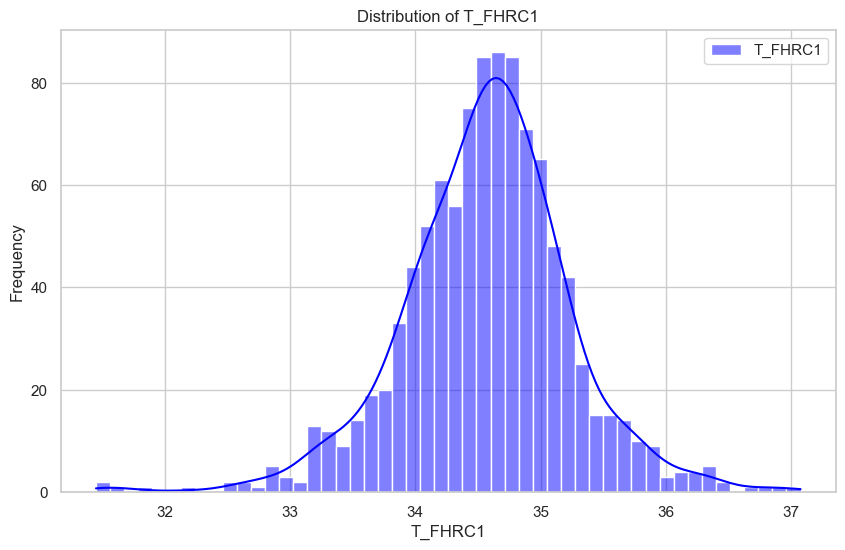

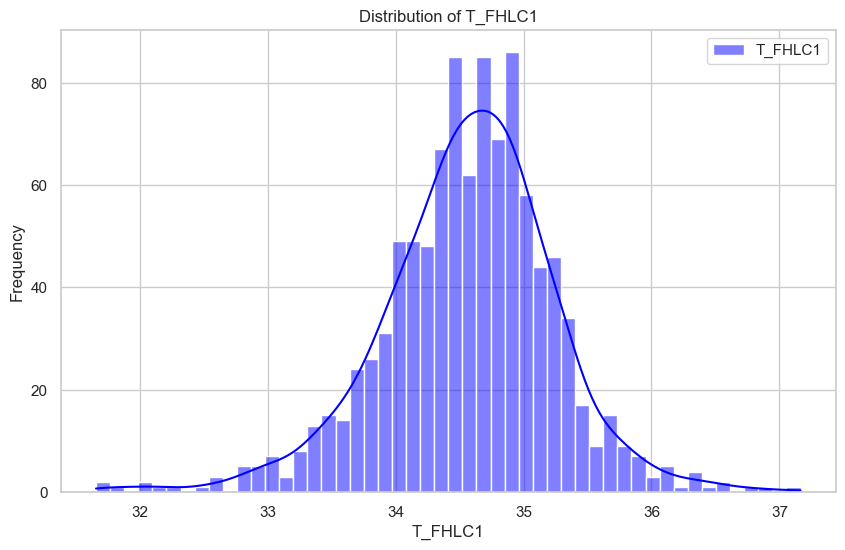

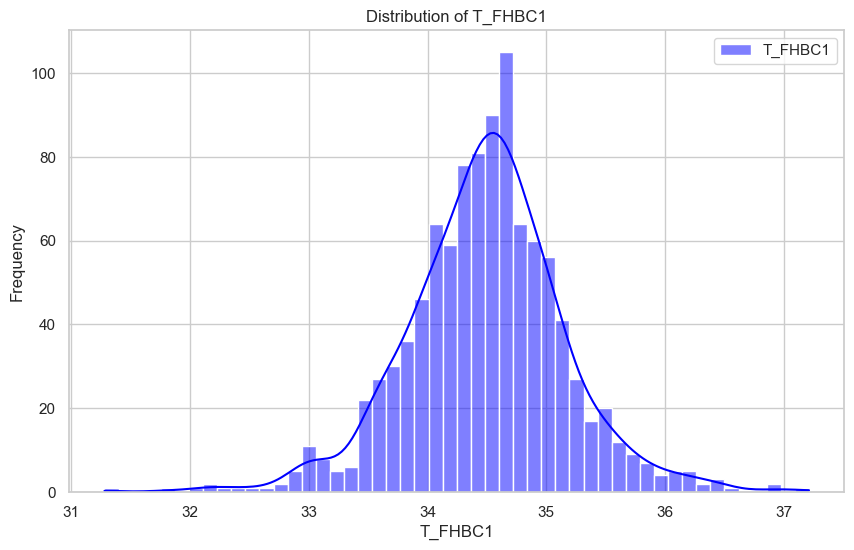

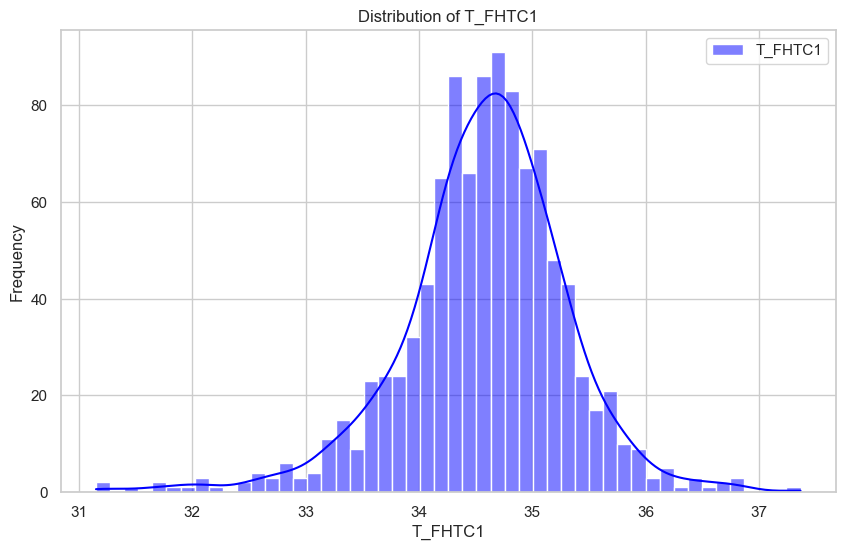

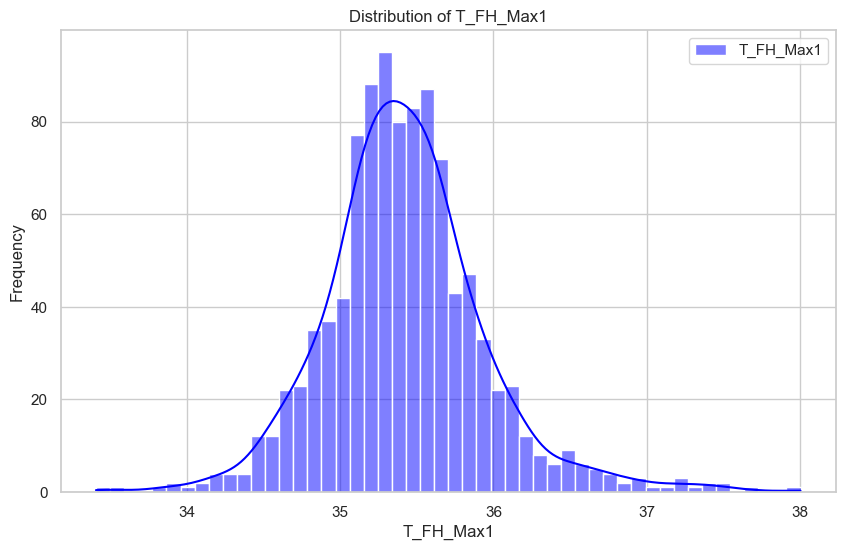

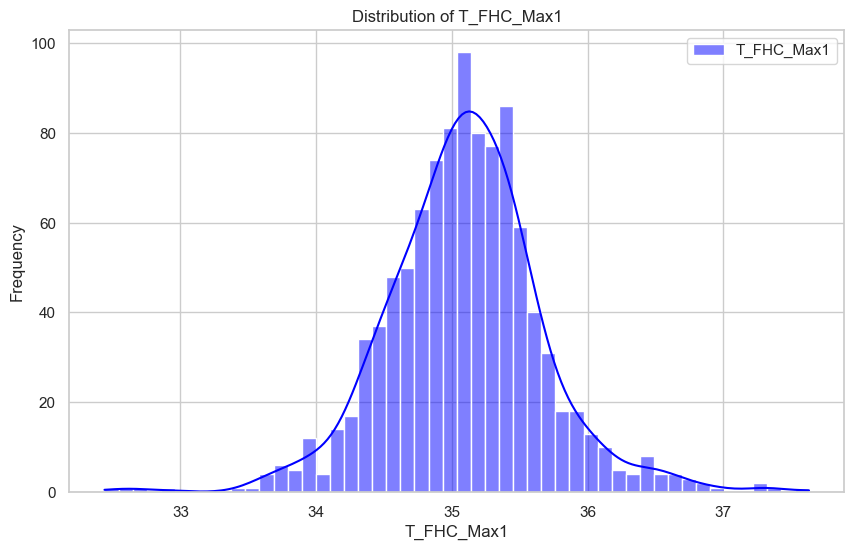

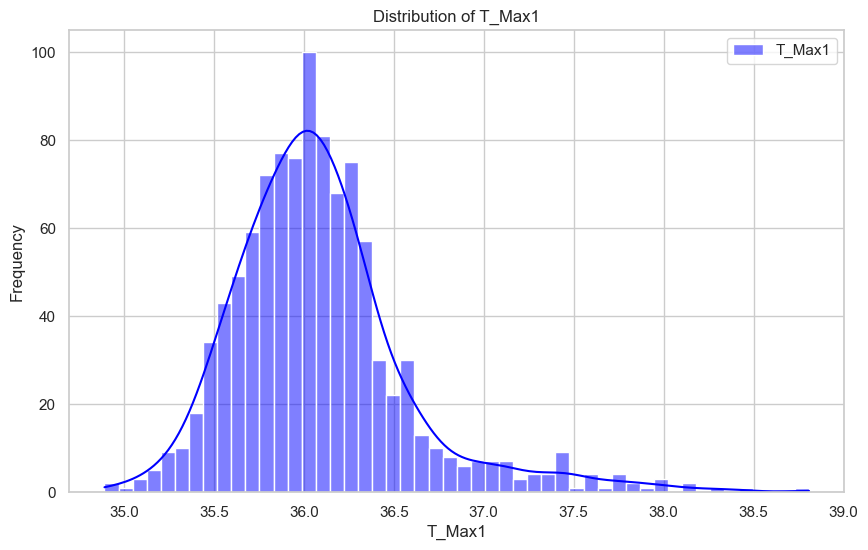

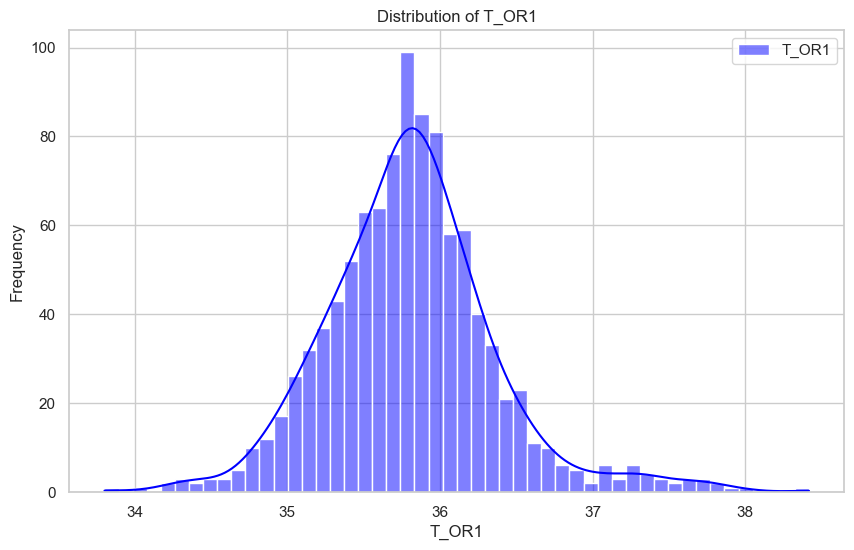

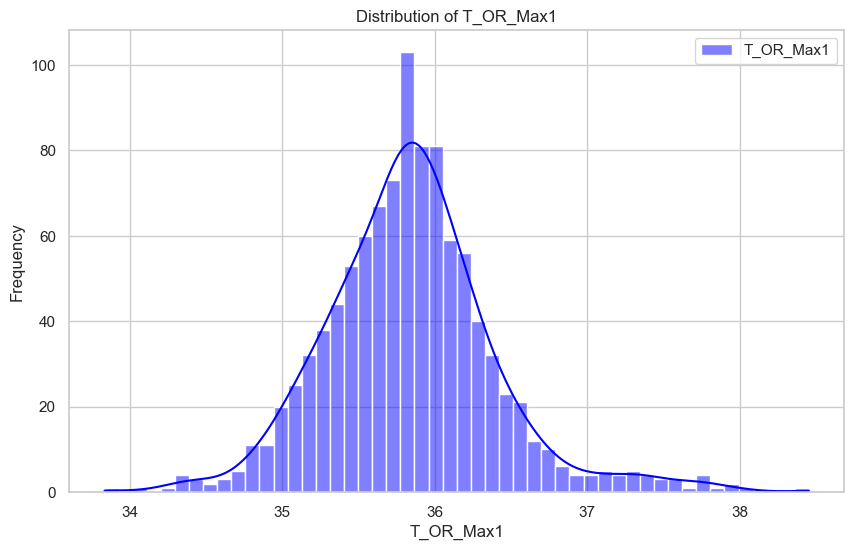

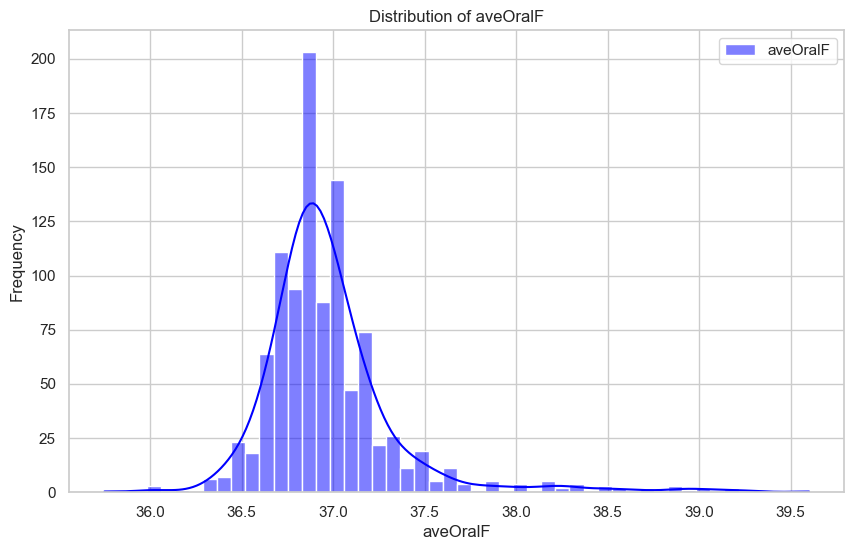

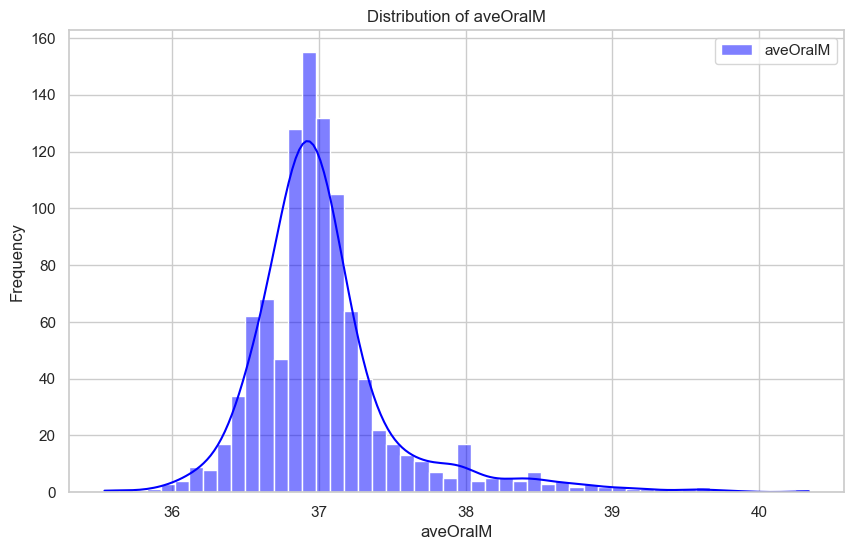

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

numeric_columns = thermo_data.select_dtypes(include=np.number).columns.tolist()

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(thermo_data[column], color='blue', kde=True, bins=50, label=column)
    plt.title('Distribution of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Data Preparation

## Create a Test Set

In [110]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(thermo_data, test_size=0.2, random_state=42)

Let's make a copy of this training set, so that we can revert back to it afterwards.

In [111]:
thermo_data = train_set.copy()

## Looking for Correlations

In [112]:
corr_matrix = thermo_data.corr(numeric_only=True)

Now, let's look at how much each attribute affects aveOralF temprature

In [113]:
corr_matrix['aveOralF'].sort_values(ascending=False)

aveOralF       1.000000
aveOralM       0.884558
T_Max1         0.760802
T_OR1          0.723605
T_OR_Max1      0.723223
canthiMax1     0.680540
canthi4Max1    0.679872
T_RC_Max1      0.672579
T_RC1          0.671694
T_RC_Wet1      0.656539
T_RC_Dry1      0.654010
Max1R13_1      0.646267
T_LC_Max1      0.632999
T_LC1          0.632793
T_LC_Dry1      0.627245
Max1L13_1      0.619755
RCC1           0.617403
T_LC_Wet1      0.610451
LCC1           0.587762
T_FH_Max1      0.568254
aveAllR13_1    0.544887
aveAllL13_1    0.544775
T_FHC_Max1     0.501008
T_FHBC1        0.475574
T_FHCC1        0.433401
T_FHRC1        0.422839
T_FHLC1        0.401011
T_FHTC1        0.383881
T_offset1      0.124212
T_atm          0.092714
Humidity       0.050252
Distance       0.017462
Name: aveOralF, dtype: float64

Similaryly, let's see how much each attribute affects aveOralM temprature.

In [114]:
corr_matrix['aveOralM'].sort_values(ascending=False)

aveOralM       1.000000
aveOralF       0.884558
T_Max1         0.850742
canthiMax1     0.785918
canthi4Max1    0.785656
T_RC_Max1      0.772007
T_RC1          0.771183
T_OR1          0.766185
T_OR_Max1      0.765980
T_RC_Wet1      0.759484
T_RC_Dry1      0.753425
T_LC_Max1      0.751552
T_LC1          0.751220
Max1R13_1      0.745597
T_LC_Dry1      0.744556
Max1L13_1      0.734853
T_LC_Wet1      0.721115
RCC1           0.718302
LCC1           0.701651
aveAllL13_1    0.651622
T_FH_Max1      0.647018
aveAllR13_1    0.631120
T_FHC_Max1     0.595194
T_FHBC1        0.556394
T_FHRC1        0.516635
T_FHCC1        0.515779
T_FHLC1        0.469559
T_FHTC1        0.456927
T_offset1      0.151436
T_atm          0.116016
Humidity       0.063608
Distance       0.012164
Name: aveOralM, dtype: float64

Let's also take a look at complete correlation matrix, to see how strongly attributes are correlated to each other. This information might be useful to merge several attribute values to reduce dimensionality of the model.

In [115]:
corr_matrix

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
T_atm,1.000000,0.105980,0.037855,0.625684,0.279830,0.296137,0.264218,0.310809,0.293744,0.283491,...,0.381130,0.391234,0.329628,0.342377,0.384199,0.252797,0.250806,0.247647,0.092714,0.116016
Humidity,0.105980,1.000000,0.008369,0.218760,0.036505,0.054228,0.092509,0.104151,0.041952,0.029354,...,0.030342,0.049777,0.017629,-0.010569,0.026121,0.057153,0.111981,0.110849,0.050252,0.063608
Distance,0.037855,0.008369,1.000000,0.027357,-0.026186,-0.024362,-0.055929,-0.059796,-0.013066,-0.026098,...,-0.009688,-0.024547,-0.015051,-0.024107,-0.013762,0.009330,0.015879,0.016543,0.017462,0.012164
T_offset1,0.625684,0.218760,0.027357,1.000000,0.258448,0.280051,0.248565,0.296563,0.269492,0.261018,...,0.384591,0.393099,0.324450,0.315700,0.373684,0.206891,0.203048,0.199293,0.124212,0.151436
Max1R13_1,0.279830,0.036505,-0.026186,0.258448,1.000000,0.905612,0.871202,0.833556,0.981200,0.995464,...,0.625858,0.708402,0.576647,0.706459,0.721756,0.878696,0.740049,0.738952,0.646267,0.745597
Max1L13_1,0.296137,0.054228,-0.024362,0.280051,0.905612,1.000000,0.777402,0.897813,0.910012,0.905464,...,0.619206,0.697216,0.571410,0.693990,0.706917,0.869297,0.734083,0.733098,0.619755,0.734853
aveAllR13_1,0.264218,0.092509,-0.055929,0.248565,0.871202,0.777402,1.000000,0.864600,0.826808,0.871284,...,0.594247,0.685639,0.544147,0.638783,0.666557,0.756825,0.665018,0.663459,0.544887,0.631120
aveAllL13_1,0.310809,0.104151,-0.059796,0.296563,0.833556,0.897813,0.864600,1.000000,0.814180,0.835208,...,0.614990,0.706010,0.565785,0.668341,0.684945,0.783638,0.683121,0.681932,0.544775,0.651622
T_RC1,0.293744,0.041952,-0.013066,0.269492,0.981200,0.910012,0.826808,0.814180,1.000000,0.982138,...,0.628297,0.711264,0.581754,0.719701,0.731068,0.896699,0.752401,0.751277,0.671694,0.771183
T_RC_Dry1,0.283491,0.029354,-0.026098,0.261018,0.995464,0.905464,0.871284,0.835208,0.982138,1.000000,...,0.637288,0.722896,0.589365,0.722687,0.735877,0.885131,0.742136,0.741105,0.654010,0.753425


## Scatter Matrix

Although, correlation coefficients are very useful but they don't account for the relationships between attributes which cannot be simply expressed in linear manner(linear means like if this goes up, other goes down or up).

Since, there are around 30 attributes, thus there will be 900 scattered subplots, which will be hard to comprehend. So, let's just consider top five strongly correlated attributes and get scatter matrix for both `aveOralF` and `aveOralM`.

Firstly, `aveOralF`

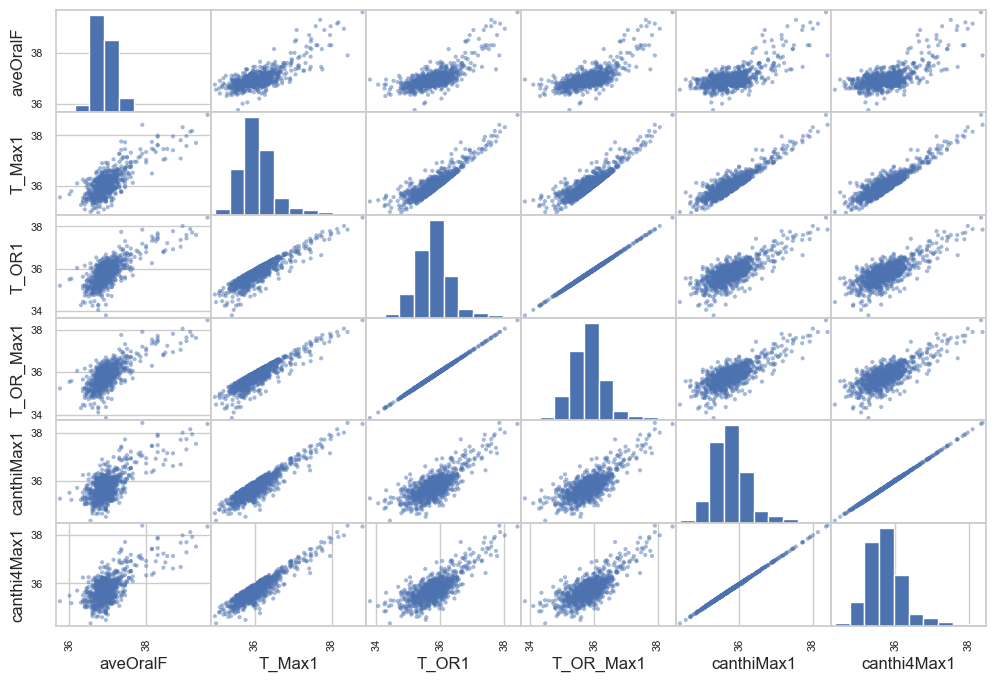

In [116]:
from pandas.plotting import scatter_matrix
attributes = ["aveOralF", "T_Max1", "T_OR1","T_OR_Max1","canthiMax1","canthi4Max1"]

scatter_matrix(thermo_data[attributes], figsize=(12, 8))
plt.show()

Looking at above scatter plot, its clear that there is an upward trend in the relation between attributes and the `aveOralF` temprature.

We could also observe that there is a linear relationship between `canthiMax1`(Max Temp. value in the extended canthi area) and `canthi4Max1`(Average temperature of the highest four pixels within the extended canthus area.)

If we plot more attributes against each other(or look at correlation matrix), we can see many similar looking attribute have strong correaltions and linear relationship.

Consider attributes representing different aspects of temperature measurements taken from specific points on the forehead. Here are some observations:

1. Spatial Information: Attributes like `T_FHCC1`, `T_FHRC1`, `T_FHLC1`, `T_FHBC1`, and `T_FHTC1` capture temperature readings from different spatial locations on the forehead (center, right, left, bottom, top, respectively).
<br>
2. Maximum Temperature: Attributes like `T_FH_Max1` represent the maximum temperature within a broader area of the forehead. 
<br>
3. Center Point Temperature: `T_FHC_Max1` specifically represents the maximum temperature at the center point of the forehead, providing a more focused measurement compared to the broader `T_FH_Max1`.

Given these distinctions, it's obvious that these attributes serve different purposes and may capture unique information about forehead temperature. While there might be some correlation between these attributes, it's reasonable to keep them all in the dataset.

Let's also check scatter matrix for `aveOralM`.

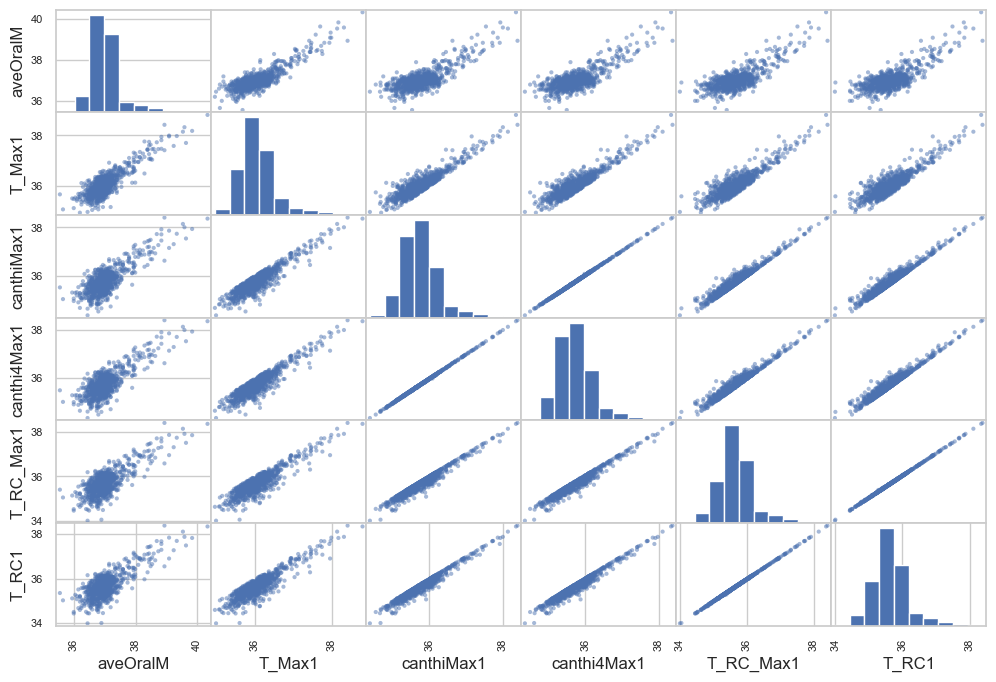

In [117]:
from pandas.plotting import scatter_matrix
attributes = ["aveOralM", "T_Max1","canthiMax1","canthi4Max1", "T_RC_Max1", "T_RC1"]

scatter_matrix(thermo_data[attributes], figsize=(12, 8))
plt.show()

Similar, to `aveOralF` scatter matrix we can observe that `aveOralM` also has upward relation with its strongly correlated attributes.

It also appears that `T_Max1` is main attribute which determines `aveOralF` and `aveOralM` tempratures as its can be observed from its stong correlation with both of them.

### Pipeline

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

Custom transformer that uses a KMeans clusterer in the fit() method to identify the main clusters in the training data, and then uses rbf_kernel() in the transform() method to measure how similar each sample is to each cluster center:<sup>[3]</sup>

In [119]:
# Reference: Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. O'Reilly Media Press
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [120]:
# Pipeline to preprocess categorical features
# Ensures that categorical features are properly encoded and handled in a machine learning model.
cat_pipeline = make_pipeline(
                SimpleImputer(strategy="most_frequent"),
                OneHotEncoder(handle_unknown="ignore")
            )

# For calculating similarity scores between data points based on clustering.
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

# Preprocess numerical features that are not clustered.
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

# Applies different preprocessing steps to different subsets of columns in the dataset.
preprocessing = ColumnTransformer([
                    ("cluster_similarity", cluster_simil, ["Max1R13_1", "Max1L13_1", "aveAllR13_1", "aveAllL13_1", "T_RC1", "T_RC_Dry1", "T_RC_Wet1", 
                    "T_RC_Max1", "T_LC1", "T_LC_Dry1", "T_LC_Wet1", "T_LC_Max1", "RCC1", "LCC1", 
                    "canthiMax1", "canthi4Max1", "T_FHCC1", "T_FHRC1", "T_FHLC1", "T_FHBC1", 
                    "T_FHTC1", "T_FH_Max1", "T_FHC_Max1", "T_Max1", "T_OR1", "T_OR_Max1"]),
                    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
                    ],
                    remainder=default_num_pipeline
                ) 

In [121]:
thermo_data_prepared = preprocessing.fit_transform(thermo_data)

In [122]:
thermo_data_prepared.shape

(816, 32)

In [123]:
preprocessing.get_feature_names_out()

array(['cluster_similarity__Cluster 0 similarity',
       'cluster_similarity__Cluster 1 similarity',
       'cluster_similarity__Cluster 2 similarity',
       'cluster_similarity__Cluster 3 similarity',
       'cluster_similarity__Cluster 4 similarity',
       'cluster_similarity__Cluster 5 similarity',
       'cluster_similarity__Cluster 6 similarity',
       'cluster_similarity__Cluster 7 similarity',
       'cluster_similarity__Cluster 8 similarity',
       'cluster_similarity__Cluster 9 similarity', 'cat__Gender_Female',
       'cat__Gender_Male', 'cat__Age_18-20', 'cat__Age_21-25',
       'cat__Age_21-30', 'cat__Age_26-30', 'cat__Age_31-40',
       'cat__Age_41-50', 'cat__Age_51-60', 'cat__Age_>60',
       'cat__Ethnicity_American Indian or Alaskan Native',
       'cat__Ethnicity_Asian', 'cat__Ethnicity_Black or African-American',
       'cat__Ethnicity_Hispanic/Latino', 'cat__Ethnicity_Multiracial',
       'cat__Ethnicity_White', 'remainder__T_atm', 'remainder__Humidity',
      

In [124]:
# Revert to a clean training set
thermo_data = train_set.drop(["aveOralF", "aveOralM"], axis=1)

# Separate labels for both aveOralF and aveOralM
thermo_data_labels_oralF = train_set["aveOralF"].copy()
thermo_data_labels_oralM = train_set["aveOralM"].copy()

# Regression to Predict `aveOralF` temprature

## Linear Regressor for `aveOralF`

Let's start with very basic linear regression model.

In [125]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())

### Training for `aveOralF`, average oral temprature in fast mode

In [126]:
lin_reg.fit(thermo_data, thermo_data_labels_oralF)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cluster_similarity',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Max1R13_1', 'Max1L13_1',
                                                   'aveAllR13_1', 'aveAllL13_1',
                                                   'T_RC1', 'T_RC_Dry1',
                                                   'T_RC_Wet1', 'T_RC_Max1',
                                                   'T_LC1', 'T_L...
                                                   'T_FHRC1', 'T_FHLC1',
                                                   'T_FHBC1', 'T_FHTC1',
                                                   'T_FH_Max1', 'T_FHC_Max1',
                                                   'T_Max1', 'T_OR1',
                                                   'T_OR_Max1']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024189A336D0>)])),
                ('linearregression', LinearRegression())])

Now, we have a working linear regression model. Let's try it out on training set.

In [127]:
thermo_data_predictions_oralF = lin_reg.predict(thermo_data)

Let's look at first 10 predictions and compare them to their labels.

In [128]:
thermo_data_predictions_oralF[:10].round(2)

array([37.01, 37.07, 37.18, 37.2 , 36.85, 37.36, 37.63, 37.04, 37.04,
       37.16])

In [129]:
thermo_data_labels_oralF.iloc[:10].values

array([36.75, 37.1 , 39.15, 38.  , 36.9 , 37.  , 38.3 , 36.85, 36.85,
       37.45])

The predicted values and labels are quite close. Let's see the error ratio.

### RMSE error for linear regression model to predict `aveOralF`

In [130]:
error_ratios = thermo_data_predictions_oralF[:10] / thermo_data_labels_oralF.iloc[:10].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

0.7%, -0.1%, -5.0%, -2.1%, -0.1%, 1.0%, -1.8%, 0.5%, 0.5%, -0.8%


The error ratio seems quite low. We will need to invetigate this further, may be we are overfitting. For now, let's check his regression model’s RMSE on the whole training set using Scikit-Learn’s `mean_squared_error()` function, with the `squared` argument set to `False`.

In [131]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(thermo_data_labels_oralF, thermo_data_predictions_oralF, squared=False)
lin_rmse

0.3365847706389632

This RMSE value is quite low. There might be a chance that we are overfitting. The best way to find out is try out other models and see how they perform.

## DecisionTreeRegressor for `aveOralF`

In [132]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(thermo_data, thermo_data_labels_oralF)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cluster_similarity',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Max1R13_1', 'Max1L13_1',
                                                   'aveAllR13_1', 'aveAllL13_1',
                                                   'T_RC1', 'T_RC_Dry1',
                                                   'T_RC_Wet1', 'T_RC_Max1',
                                                   'T_LC1', 'T_L...
                                                   'T_FH_Max1', 'T_FHC_Max1',
                                                   'T_Max1', 'T_OR1',
                                                   'T_OR_Max1']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024189A336D0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [133]:
thermo_data_predictions_oralF = tree_reg.predict(thermo_data)

In [134]:
tree_rmse = mean_squared_error(thermo_data_labels_oralF, thermo_data_predictions_oralF, squared=False)

In [135]:
tree_rmse

0.0

#### Better Evaluation Using Cross-Validation

We definetely need to check if model is overfitting the data. We can use Scikit-Learn’s k_-fold cross-validation feature. 

In [136]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, thermo_data, thermo_data_labels_oralF,
                              scoring="neg_root_mean_squared_error", cv=10)

Let's look at the results:

In [137]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      0.382155
std       0.030446
min       0.338980
25%       0.355397
50%       0.382474
75%       0.406755
max       0.422860
dtype: float64

Although, decision tree model doesn't look as good as it did earlier. But, its error is quite close to that of linear regression model.

Let's also perform cross-validation on linear regression model too.

In [138]:
linear_rmses = -cross_val_score(lin_reg, thermo_data, thermo_data_labels_oralF,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(linear_rmses).describe()

count    10.000000
mean      0.558844
std       0.701604
min       0.252001
25%       0.309421
50%       0.334943
75%       0.385090
max       2.548092
dtype: float64

So, mean RMSE for linear regression model is `0.5588` with standard deviation of `0.7016` and for decision tree model is `0.3821` with standard deviation of `0.0304`. Clearly, decision tree model's performance is better than that of linear model.

But, we can still see there is a bit of overfitting, since training error is low(`0.0`), while validation error is a bit high(`0.3821`).

## RandomForestRegressor for `aveOralF`

In [139]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg, thermo_data, thermo_data_labels_oralF,
                                scoring="neg_root_mean_squared_error", cv=10)

In [140]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      0.279335
std       0.030635
min       0.229529
25%       0.259569
50%       0.276670
75%       0.289255
max       0.334090
dtype: float64

This model is even better with mean RMSE of `0.2793` and standard deviation of `0.0306`.

## Polynomial Regression for `aveOralF`

### Polynomial with `degree = 2`

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

degree = 2

# Create a combined pipeline that includes preprocessing, polynomial feature expansion, 
# and linear regression
polynomial_regression_pipeline = Pipeline([
    ("preprocessing", preprocessing),  # Your initial preprocessing steps
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin_reg", LinearRegression())
])

# Fit the combined pipeline to your training data
polynomial_regression_pipeline.fit(thermo_data, thermo_data_labels_oralF)

poly_rmses = -cross_val_score(polynomial_regression_pipeline, thermo_data, thermo_data_labels_oralF,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(poly_rmses).describe()

count    1.000000e+01
mean     3.625440e+11
std      1.138342e+12
min      3.960416e-01
25%      7.533843e+06
50%      2.772440e+07
75%      2.234481e+08
max      3.602258e+12
dtype: float64

Seems, like polynomial regressor's performance(mean RMSE `1.370370e+11` with std `4.324104e+11`) is way too higher than that of RandomForestRegressor(with mean RMSE of `0.2793` and standard deviation of `0.0306`).

## Fine-Tune the Models for `aveOralF`

We will use `RandomizedSearchCV` to fine-tune best model found so far, i.e., `RandomForestRegressor`.

In [142]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_distribs = {'preprocessing__cluster_similarity__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(thermo_data, thermo_data_labels_oralF)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('cluster_similarity',
                                                                               ClusterSimilarity(random_state=42),
                                                                               ['Max1R13_1',
                                                                                'Max1L13_1',
                                                                                'aveAllR13_1',
                                                                                'aveAllL13_1',
                                                                                'T_RC1',
                                                                                'T_RC_Dry1',
                                                                                'T_RC_...
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__cluster_similarity__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000241899B8FD0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002418FE2A850>},
                   random_state=42, scoring='neg_root_mean_squared_error')

#### Analyzing the Best Models and Their Errors

In [143]:
final_model = rnd_search.best_estimator_

In [144]:
feature_importances = final_model["random_forest"].feature_importances_

In [145]:
feature_importances.round(3)

array([0.012, 0.015, 0.038, 0.008, 0.015, 0.011, 0.012, 0.112, 0.008,
       0.042, 0.022, 0.011, 0.016, 0.014, 0.014, 0.121, 0.005, 0.016,
       0.01 , 0.01 , 0.013, 0.012, 0.013, 0.013, 0.051, 0.007, 0.02 ,
       0.01 , 0.006, 0.009, 0.002, 0.026, 0.021, 0.006, 0.008, 0.026,
       0.011, 0.011, 0.009, 0.016, 0.068, 0.004, 0.005, 0.003, 0.006,
       0.   , 0.001, 0.   , 0.   , 0.001, 0.   , 0.002, 0.002, 0.008,
       0.002, 0.003, 0.005, 0.023, 0.021, 0.015, 0.025])

In [146]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.1210906694728292, 'cluster_similarity__Cluster 15 similarity'),
 (0.11197163539263705, 'cluster_similarity__Cluster 7 similarity'),
 (0.06849593515936982, 'cluster_similarity__Cluster 40 similarity'),
 (0.050807109178682947, 'cluster_similarity__Cluster 24 similarity'),
 (0.04210393890086263, 'cluster_similarity__Cluster 9 similarity'),
 (0.03830679432993516, 'cluster_similarity__Cluster 2 similarity'),
 (0.026185704370496613, 'cluster_similarity__Cluster 31 similarity'),
 (0.025993874870313776, 'cluster_similarity__Cluster 35 similarity'),
 (0.02456314401691401, 'remainder__T_offset1'),
 (0.023303763321279224, 'remainder__T_atm'),
 (0.02206149929716474, 'cluster_similarity__Cluster 10 similarity'),
 (0.02144904045479285, 'remainder__Humidity'),
 (0.02089584854931706, 'cluster_similarity__Cluster 32 similarity'),
 (0.02010066024565449, 'cluster_similarity__Cluster 26 similarity'),
 (0.01624268328018418, 'cluster_similarity__Cluster 39 similarity'),
 (0.01583950102370825, 'cluster_s

## Evaluate Your System on the Test Set

Let's get the predictors and the labels from the test set and run final_model to transform the data and make predictions, then evaluate these predictions:

In [147]:
# Revert to a clean training set
thermo_data_test = test_set.drop(["aveOralF", "aveOralM"], axis=1)

# Separate labels for both aveOralF and aveOralM
thermo_data_test_labels_oralF = test_set["aveOralF"].copy()

final_predictions = final_model.predict(thermo_data_test)
final_rmse = mean_squared_error(thermo_data_test_labels_oralF, final_predictions, squared=False)

print(final_rmse)

0.24896751008601817


So, final_model for predicting `aveOralF` has mean RMSE of `0.2489`, which is so far the lowest and therefore, make the the `final_model` the best. 

# Regression to Predict `aveOralM` temprature

## Linear Regressor for `aveOralM`

Let's start with very basic linear regression model.

In [148]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())

### Training for `aveOralM`, average oral temprature in monitor mode

In [149]:
lin_reg.fit(thermo_data, thermo_data_labels_oralM)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cluster_similarity',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Max1R13_1', 'Max1L13_1',
                                                   'aveAllR13_1', 'aveAllL13_1',
                                                   'T_RC1', 'T_RC_Dry1',
                                                   'T_RC_Wet1', 'T_RC_Max1',
                                                   'T_LC1', 'T_L...
                                                   'T_FHRC1', 'T_FHLC1',
                                                   'T_FHBC1', 'T_FHTC1',
                                                   'T_FH_Max1', 'T_FHC_Max1',
                                                   'T_Max1', 'T_OR1',
                                                   'T_OR_Max1']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024189A336D0>)])),
                ('linearregression', LinearRegression())])

Now, we have a working linear regression model. Let's try it out on training set.

In [150]:
thermo_data_predictions_oralM = lin_reg.predict(thermo_data)

Let's look at first 10 predictions and compare them to their labels.

In [151]:
thermo_data_predictions_oralM[:10].round(2)

array([37.14, 37.1 , 37.31, 37.29, 36.81, 37.59, 37.84, 37.16, 37.14,
       37.35])

In [152]:
thermo_data_labels_oralM.iloc[:10].values

array([36.94, 36.84, 39.54, 37.94, 36.89, 37.59, 38.84, 36.49, 36.79,
       37.49])

The predicted values and labels are quite close. Let's see the error ratio.

### RMSE error for linear regression model to predict `aveOralM`

In [153]:
error_ratios = thermo_data_predictions_oralM[:10] / thermo_data_labels_oralM.iloc[:10].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

0.5%, 0.7%, -5.6%, -1.7%, -0.2%, -0.0%, -2.6%, 1.8%, 1.0%, -0.4%


The error ratio seems quite low. We will need to invetigate this further, may be we are overfitting. For now, let's check his regression model’s RMSE on the whole training set using Scikit-Learn’s `mean_squared_error()` function, with the `squared` argument set to `False`.

In [154]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(thermo_data_labels_oralM, thermo_data_predictions_oralM, squared=False)
lin_rmse

0.4231297100393131

This RMSE value is quite low. There might be a chance that we are overfitting. The best way to find out is try out other models and see how they perform.

## DecisionTreeRegressor for `aveOralM`

In [155]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(thermo_data, thermo_data_labels_oralM)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cluster_similarity',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Max1R13_1', 'Max1L13_1',
                                                   'aveAllR13_1', 'aveAllL13_1',
                                                   'T_RC1', 'T_RC_Dry1',
                                                   'T_RC_Wet1', 'T_RC_Max1',
                                                   'T_LC1', 'T_L...
                                                   'T_FH_Max1', 'T_FHC_Max1',
                                                   'T_Max1', 'T_OR1',
                                                   'T_OR_Max1']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024189A336D0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [156]:
thermo_data_predictions_oralM = tree_reg.predict(thermo_data)

In [157]:
tree_rmse = mean_squared_error(thermo_data_labels_oralM, thermo_data_predictions_oralM, squared=False)

In [158]:
tree_rmse

0.0

#### Better Evaluation Using Cross-Validation

We definetely need to check if model is overfitting the data. We can use Scikit-Learn’s k_-fold cross-validation feature. 

In [159]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, thermo_data, thermo_data_labels_oralM,
                              scoring="neg_root_mean_squared_error", cv=10)

Let's look at the results:

In [160]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      0.383469
std       0.040415
min       0.322197
25%       0.350593
50%       0.388526
75%       0.412031
max       0.452837
dtype: float64

Although, decision tree model doesn't look as good as it did earlier. But, its error is quite close to that of linear regression model.

Let's also perform cross-validation on linear regression model too.

In [161]:
linear_rmses = -cross_val_score(lin_reg, thermo_data, thermo_data_labels_oralM,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(linear_rmses).describe()

count    10.000000
mean      0.722250
std       0.916162
min       0.339642
25%       0.358345
50%       0.434020
75%       0.529787
max       3.317675
dtype: float64

So, mean RMSE for linear regression model is `0.7222` with standard deviation of `0.9161` and for decision tree model is `0.3834` with standard deviation of `0.0404`. Clearly, decision tree model's performance is better than that of linear model.

But, we can still see there is a bit of overfitting, since training error is low(`0.0`), while validation error is a bit high(`0.3834`).

## RandomForestRegressor for `aveOralM`

In [162]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg, thermo_data, thermo_data_labels_oralM,
                                scoring="neg_root_mean_squared_error", cv=10)

In [163]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      0.296220
std       0.035207
min       0.256105
25%       0.264632
50%       0.286340
75%       0.331000
max       0.345039
dtype: float64

This model is even better with mean RMSE of `0.2962` and standard deviation of `0.0352`.

## Polynomial Regression for `aveOralM`

### Polynomial with `degree = 2`

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

degree = 2

# Create a combined pipeline that includes preprocessing, polynomial feature expansion, 
# and linear regression
polynomial_regression_pipeline = Pipeline([
    ("preprocessing", preprocessing),  # Your initial preprocessing steps
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin_reg", LinearRegression())
])

# Fit the combined pipeline to your training data
polynomial_regression_pipeline.fit(thermo_data, thermo_data_labels_oralM)

poly_rmses = -cross_val_score(polynomial_regression_pipeline, thermo_data, thermo_data_labels_oralM,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(poly_rmses).describe()

count    1.000000e+01
mean     2.392345e+11
std      7.476042e+11
min      8.498618e-01
25%      5.981982e+06
50%      5.213140e+07
75%      2.875863e+08
max      2.366837e+12
dtype: float64

Seems, like polynomial regressor's performance(mean RMSE `3.048207e+11` with std `9.627876e+11`) is way too higher than that of RandomForestRegressor(with mean RMSE of `0.2962` and standard deviation of `0.0352`).

## Fine-Tune the Models for `aveOralM`

We will use `RandomizedSearchCV` to fine-tune best model found so far, i.e., `RandomForestRegressor`.

In [165]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_distribs = {'preprocessing__cluster_similarity__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(thermo_data, thermo_data_labels_oralM)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('cluster_similarity',
                                                                               ClusterSimilarity(random_state=42),
                                                                               ['Max1R13_1',
                                                                                'Max1L13_1',
                                                                                'aveAllR13_1',
                                                                                'aveAllL13_1',
                                                                                'T_RC1',
                                                                                'T_RC_Dry1',
                                                                                'T_RC_...
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__cluster_similarity__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024189B3B990>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000241899BB610>},
                   random_state=42, scoring='neg_root_mean_squared_error')

#### Analyzing the Best Models and Their Errors

In [166]:
final_model = rnd_search.best_estimator_

In [167]:
feature_importances = final_model["random_forest"].feature_importances_

In [168]:
feature_importances.round(3)

array([0.011, 0.02 , 0.047, 0.01 , 0.015, 0.02 , 0.011, 0.115, 0.014,
       0.049, 0.02 , 0.012, 0.013, 0.015, 0.014, 0.124, 0.008, 0.01 ,
       0.016, 0.008, 0.013, 0.009, 0.012, 0.013, 0.043, 0.004, 0.015,
       0.007, 0.01 , 0.015, 0.001, 0.024, 0.041, 0.006, 0.015, 0.032,
       0.018, 0.014, 0.008, 0.02 , 0.04 , 0.005, 0.006, 0.002, 0.003,
       0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.003,
       0.001, 0.003, 0.002, 0.016, 0.016, 0.008, 0.017])

In [169]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.12389073637956216, 'cluster_similarity__Cluster 15 similarity'),
 (0.114915610107999, 'cluster_similarity__Cluster 7 similarity'),
 (0.04896039501569061, 'cluster_similarity__Cluster 9 similarity'),
 (0.04746369018809047, 'cluster_similarity__Cluster 2 similarity'),
 (0.04285146328298496, 'cluster_similarity__Cluster 24 similarity'),
 (0.04148429336262209, 'cluster_similarity__Cluster 32 similarity'),
 (0.040245147304874634, 'cluster_similarity__Cluster 40 similarity'),
 (0.03174764187690246, 'cluster_similarity__Cluster 35 similarity'),
 (0.02368841970782468, 'cluster_similarity__Cluster 31 similarity'),
 (0.02023618711629825, 'cluster_similarity__Cluster 39 similarity'),
 (0.02007123072155518, 'cluster_similarity__Cluster 1 similarity'),
 (0.020062378436504106, 'cluster_similarity__Cluster 10 similarity'),
 (0.01991390792194513, 'cluster_similarity__Cluster 5 similarity'),
 (0.01780623378323157, 'cluster_similarity__Cluster 36 similarity'),
 (0.01677765974387045, 'remainder__T_of

## Evaluate Your System on the Test Set

Let's get the predictors and the labels from the test set and run final_model to transform the data and make predictions, then evaluate these predictions:

In [170]:
# Revert to a clean training set
thermo_data_test = test_set.drop(["aveOralF", "aveOralM"], axis=1)

# Separate labels for both aveOralF and aveOralM
thermo_data_test_labels_oralM = test_set["aveOralM"].copy()

final_predictions = final_model.predict(thermo_data_test)
final_rmse = mean_squared_error(thermo_data_test_labels_oralM, final_predictions, squared=False)

print(final_rmse)

0.2530027125329293


So, final_model for predicting `aveOralM` has mean RMSE of `0.2530`, which is so far the lowest and therefore, make the the `final_model` the best. 

# Classification to Predict Fever or Not

## Preparing the Target Variables

Let's first create binary target variables for classification tasks based on the thresholds for aveOralF and aveOralM.

In [171]:
thermo_data = train_set.copy()

# Assuming `thermo_data` is your DataFrame containing the dataset
thermo_data['fever_aveOralF'] = (thermo_data['aveOralF'] >= 37.5).astype(int)
thermo_data['fever_aveOralM'] = (thermo_data['aveOralM'] >= 37.5).astype(int)

thermo_data.head(10)

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM,fever_aveOralF,fever_aveOralM
743,Female,18-20,White,23.8,24.4,0.65,1.2700,35.743333,35.723333,35.103333,...,35.3000,35.8200,35.713333,36.0800,35.623333,35.6700,36.75,36.94,0,0
137,Female,21-25,Black or African-American,24.1,25.9,0.79,0.9650,35.715000,35.400000,35.247500,...,34.4050,34.9525,34.807500,36.0325,35.977500,36.0175,37.10,36.84,0,0
799,Male,21-25,White,28.6,49.2,0.60,2.5350,38.082500,38.042500,37.575000,...,37.3675,38.0025,37.632500,38.1450,37.875000,37.9025,39.15,39.54,1,1
933,Male,21-25,Black or African-American,23.9,19.3,0.64,0.9050,35.975000,36.297500,35.232500,...,35.4225,36.1450,35.622500,37.0325,36.992500,37.0325,38.00,37.94,1,1
822,Female,18-20,White,24.5,23.1,0.60,1.1100,35.535000,35.212500,34.747500,...,33.9975,35.1400,34.145000,35.5925,35.365000,35.3950,36.90,36.89,0,0
765,Male,21-25,White,25.1,49.2,0.60,1.5125,36.300000,36.437500,35.912500,...,35.1200,35.7600,35.625000,36.6900,36.505000,36.5275,37.00,37.59,0,1
261,Male,18-20,White,25.5,25.5,0.66,1.0900,37.572500,37.922500,37.232500,...,36.4100,37.2900,36.710000,37.9425,37.397500,37.4450,38.30,38.84,1,1
567,Male,18-20,White,23.5,43.3,0.54,0.9825,35.597500,35.930000,34.655000,...,34.1825,35.0775,34.960000,36.0325,35.542500,35.5875,36.85,36.49,0,0
832,Female,21-25,White,23.8,23.8,0.60,1.0075,36.040000,36.220000,35.477500,...,35.0475,35.6050,35.362500,36.3650,36.045000,36.0650,36.85,36.79,0,0
381,Female,18-20,Black or African-American,20.8,58.7,0.70,0.4775,35.662500,35.995000,35.247500,...,34.1925,35.6625,35.190000,36.7425,36.707500,36.7425,37.45,37.49,0,0


## Classifier 1: Predict Fever or Not Based on `aveOralF`

You can use a variety of classification algorithms. Logistic regression is a good starting point due to its simplicity and interpretability.

### Logistic Regression

Designing a function that will take care of printing performance metrics and plotting ROC graph.

In [172]:
def performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba):
    # Calculate various performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)


    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


    # Print the calculated metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", roc_auc)

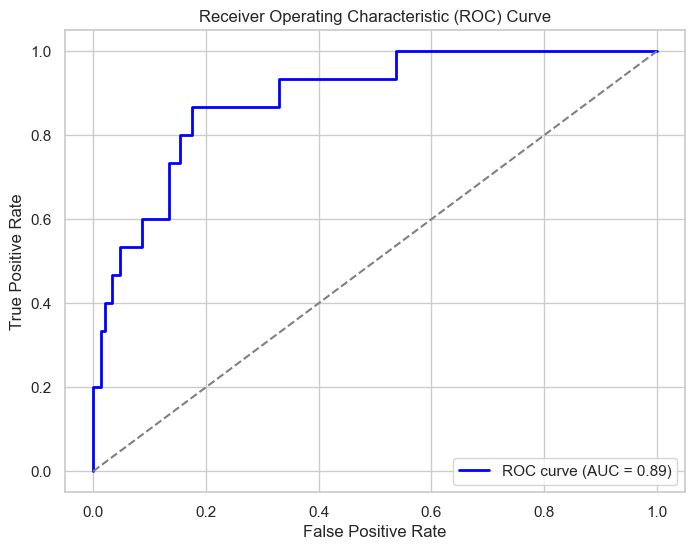

Accuracy: 0.9085365853658537
Precision: 0.9085365853658537
Recall: 1.0
F1 Score: 0.9520766773162939
AUC-ROC: 0.8881431767337807


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Splitting the data into training and testing sets
X = thermo_data.drop(['aveOralF', 'aveOralM', 'fever_aveOralF', 'fever_aveOralM'], axis=1)  # Features
y = thermo_data['fever_aveOralF']  # Target for aveOralF fever classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with preprocessing and the logistic regression model
lr_classifier = make_pipeline(preprocessing, LogisticRegression(max_iter=1000))

# Training the model
lr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = lr_classifier.predict(X_test)
y_pred_proba = lr_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

### Decision Tree Classifier

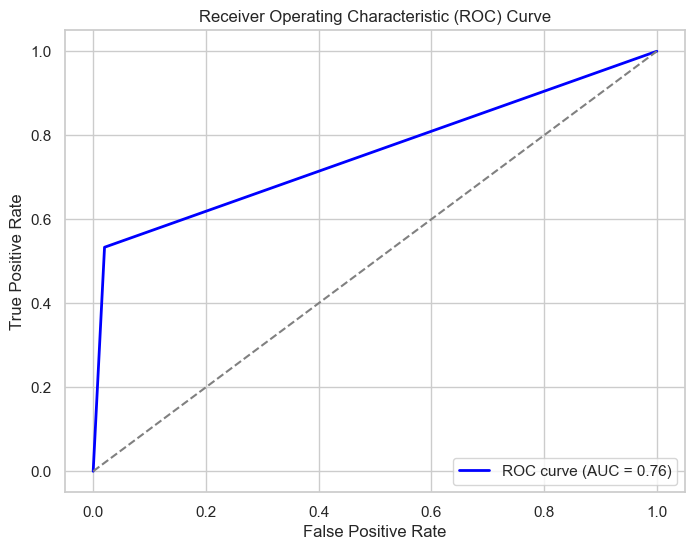

Accuracy: 0.9390243902439024
Precision: 0.9334883990551136
Recall: 0.9390243902439024
F1 Score: 0.9347377707093423
AUC-ROC: 0.756599552572707


In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc

# Define preprocessing steps
numeric_features = ["T_atm", "Humidity", "Distance", "T_offset1", "Max1R13_1", "Max1L13_1", "aveAllR13_1", "aveAllL13_1", 
                    "T_RC1", "T_RC_Dry1", "T_RC_Wet1", "T_RC_Max1", "T_LC1", "T_LC_Dry1", "T_LC_Wet1", "T_LC_Max1", 
                    "RCC1", "LCC1", "canthiMax1", "canthi4Max1", "T_FHCC1", "T_FHRC1", "T_FHLC1", "T_FHBC1", "T_FHTC1", 
                    "T_FH_Max1", "T_FHC_Max1", "T_Max1", "T_OR1", "T_OR_Max1"]
categorical_features = []  

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing with Decision Tree classifier
dt_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

### Random Forest Classifier

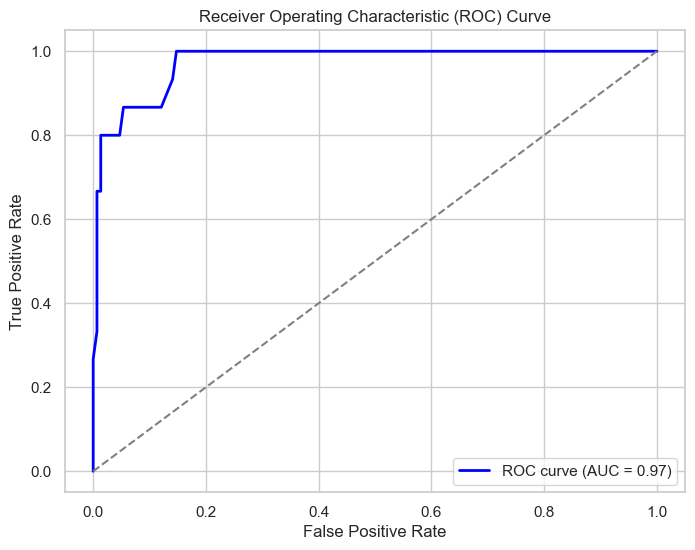

Accuracy: 0.9573170731707317
Precision: 0.9548700256739409
Recall: 0.9573170731707317
F1 Score: 0.9551585050734229
AUC-ROC: 0.9740492170022372


In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create the preprocessing pipeline including Random Forest classifier
rf_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

### K-Nearest Neighbor(KNN) Classifier

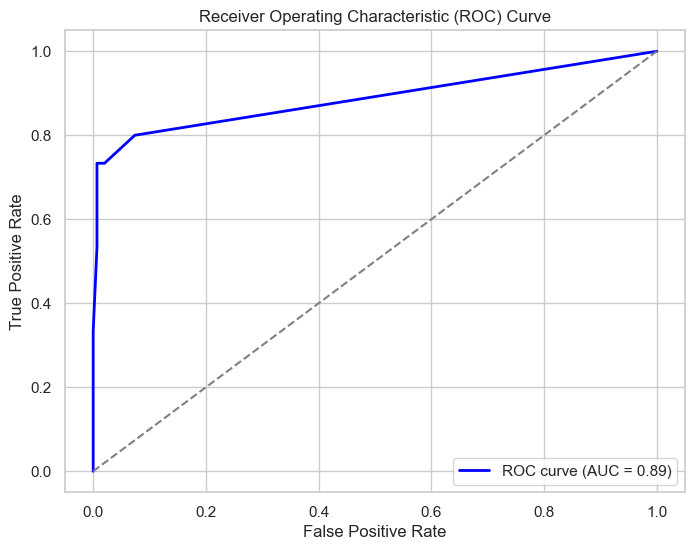

Accuracy: 0.9512195121951219
Precision: 0.9488067138735905
Recall: 0.9512195121951219
F1 Score: 0.9456033376123234
AUC-ROC: 0.8874720357941834


In [176]:
from sklearn.neighbors import KNeighborsClassifier


# Create the preprocessing pipeline including KNN classifier
knn_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=10))])

knn_classifier.fit(X_train, y_train)

# Predictions
y_pred = knn_classifier.predict(X_test)
y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

#### Comparison of various classifiers based on different performance metrics:

1. Logistic Regression:
        Accuracy:0.909,
        Precision:0.909,
        Recall:1.000,
        F1 Score:0.952,
        AUC-ROC:0.888
2. Decision Tree Classifier:
        Accuracy:0.939,
        Precision:0.933,
        Recall:0.939,
        F1 Score:0.935,
        AUC-ROC:0.757

3. Random Forest Classifier:
        Accuracy:0.957,
        Precision:0.955,
        Recall:0.957,
        F1 Score:0.955,
        AUC-ROC:0.974

4. K-NN Classifier:
        Accuracy:0.951,
        Precision:0.949,
        Recall:0.951,
        F1 Score:0.946,
        AUC-ROC:0.887

Based on these metrics:

- Random Forest Classifier appears to perform the best overall, with the highest accuracy, precision, recall, F1 score, and AUC-ROC score.
- Logistic Regression also performs well, particularly in terms of precision and recall, but slightly lower than Random Forest Classifier in terms of accuracy and AUC-ROC.
- K-NN Classifier and Decision Tree Classifier have comparable performance, with K-NN having slightly higher accuracy and AUC-ROC, while Decision Tree has slightly higher precision and recall.


### Testing Top Classifiers 

Top classifiers found so far are: `Random Forest Classifier`, `Logistic Regressor`, `k-NN Classifier`.

Firstly, let's get the test set.

In [177]:
thermo_data_test = test_set.copy()

# Assuming `thermo_data` is your DataFrame containing the dataset
thermo_data_test['fever_aveOralF'] = (thermo_data_test['aveOralF'] >= 37.5).astype(int)
thermo_data_test['fever_aveOralM'] = (thermo_data_test['aveOralM'] >= 37.5).astype(int)

thermo_data_test.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM,fever_aveOralF,fever_aveOralM
523,Male,41-50,Black or African-American,24.1,30.2,0.70,0.807500,35.277500,35.400000,34.6550,...,34.2575,35.162500,35.1375,36.032500,35.9975,36.017500,36.90,37.09,0,0
602,Male,31-40,White,23.4,15.1,0.70,0.972500,35.072500,34.757500,34.4325,...,33.7875,34.580000,34.3500,35.452500,35.3350,35.367500,36.75,36.74,0,0
526,Female,18-20,White,25.4,28.2,0.65,1.150000,35.337500,35.837500,34.5050,...,35.3875,36.175000,35.6600,36.320000,34.4575,34.492500,36.75,36.79,0,0
31,Male,>60,Asian,22.8,33.0,0.80,0.675000,35.050000,34.570000,34.5650,...,33.9800,34.712500,34.4950,35.727500,35.6925,35.727500,36.65,36.49,0,0
616,Male,26-30,Asian,23.8,20.6,0.60,0.763333,35.213333,35.463333,34.6600,...,34.8700,35.226667,35.0800,35.786667,35.6200,35.643333,36.80,36.79,0,0


In [178]:
# Splitting the data into training and testing sets
X_test = thermo_data_test.drop(['aveOralF', 'aveOralM', 'fever_aveOralF', 'fever_aveOralM'], axis=1)  # Features
y_test = thermo_data_test['fever_aveOralF']  # Target for aveOralF fever classification

#### Testing Logistic Regression

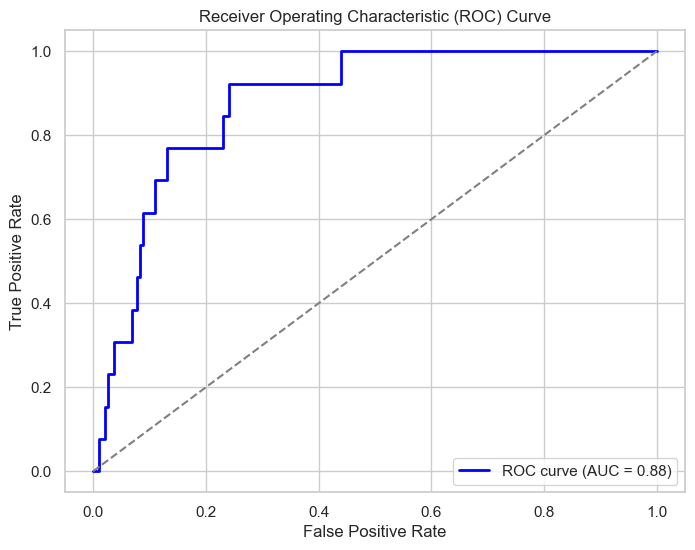

Accuracy: 0.9362745098039216
Precision: 0.9362745098039217
Recall: 1.0
F1 Score: 0.9670886075949368
AUC-ROC: 0.8795811518324608


In [179]:
# Make predictions
y_pred = lr_classifier.predict(X_test)
y_pred_proba = lr_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

#### Testing Random Forest Classifier

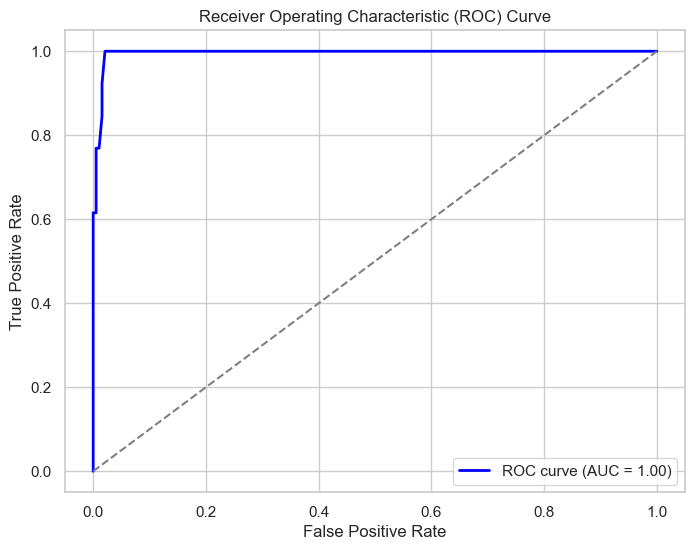

Accuracy: 0.9705882352941176
Precision: 0.9689123512652923
Recall: 0.9705882352941176
F1 Score: 0.9680668310659168
AUC-ROC: 0.995569875151027


In [180]:
# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

#### Testing K-NN Classifier

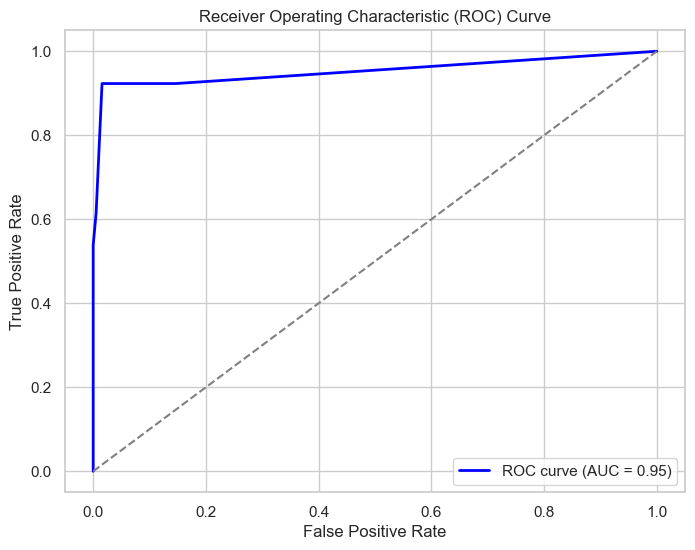

Accuracy: 0.9705882352941176
Precision: 0.9714840250821141
Recall: 0.9705882352941176
F1 Score: 0.9664038811400848
AUC-ROC: 0.9524768425291986


In [181]:
# Make predictions
y_pred = knn_classifier.predict(X_test)
y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

#### Performance Metrics of Classifiers for Training Set:
    
    Random Forest Classifier: Accuracy:0.957, Precision:0.955, Recall:0.957, F1 Score:0.955, AUC-ROC:0.974

    Logistic Regression: Accuracy:0.909, Precision:0.909, Recall:1.000, F1 Score:0.952, AUC-ROC:0.888

    K-NN Classifier: Accuracy:0.951, Precision:0.949, Recall:0.951, F1 Score:0.946, AUC-ROC:0.887

#### Performance Metrics of Classifiers for Testing Set:
    
    Random Forest Classifier: Accuracy:0.957, Precision:0.955, Recall:0.957, F1 Score:0.955, AUC-ROC:0.974

    Logistic Regression: Accuracy:0.936, Precision:0.936, Recall:1.000, F1 Score:0.967, AUC-ROC:0.880

    K-NN Classifier: Accuracy:0.976, Precision:0.971, Recall:0.971, F1 Score:0.966, AUC-ROC:0.952

<br></br>

We can observe that performance of `Random_Forest_Classifier` remains pretty much the same for both training and testing set, while performance of `Logistic_Regression` and `k-NN_Classifier` slightly increases.

## Classifier 2: Predict Fever or Not Based on `aveOralM`

You can use a variety of classification algorithms. Logistic regression is a good starting point due to its simplicity and interpretability.

### Logistic Regression

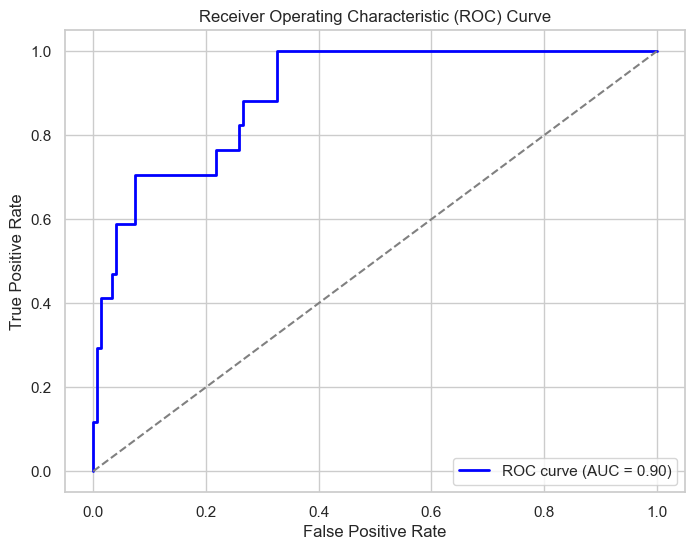

Accuracy: 0.8963414634146342
Precision: 0.896341463414634
Recall: 1.0
F1 Score: 0.9453376205787781
AUC-ROC: 0.8995598239295719


In [182]:
# Splitting the data into training and testing sets
X = thermo_data.drop(['aveOralF', 'aveOralM', 'fever_aveOralF', 'fever_aveOralM'], axis=1)  # Features
y = thermo_data['fever_aveOralM']  # Target for aveOralM fever classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with preprocessing and the logistic regression model
lr_classifier = make_pipeline(preprocessing, LogisticRegression(max_iter=1000))

# Training the model
lr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = lr_classifier.predict(X_test)
y_pred_proba = lr_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

### Decision Tree Classifier

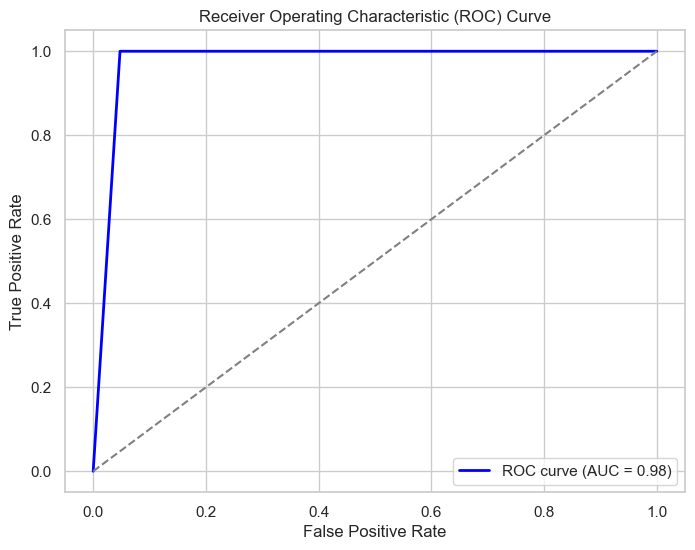

Accuracy: 0.9573170731707317
Precision: 0.9697662601626016
Recall: 0.9573170731707317
F1 Score: 0.9604402141582391
AUC-ROC: 0.9761904761904762


In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc

# Define preprocessing steps
numeric_features = ["T_atm", "Humidity", "Distance", "T_offset1", "Max1R13_1", "Max1L13_1", "aveAllR13_1", "aveAllL13_1", 
                    "T_RC1", "T_RC_Dry1", "T_RC_Wet1", "T_RC_Max1", "T_LC1", "T_LC_Dry1", "T_LC_Wet1", "T_LC_Max1", 
                    "RCC1", "LCC1", "canthiMax1", "canthi4Max1", "T_FHCC1", "T_FHRC1", "T_FHLC1", "T_FHBC1", "T_FHTC1", 
                    "T_FH_Max1", "T_FHC_Max1", "T_Max1", "T_OR1", "T_OR_Max1"]
categorical_features = []  

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing with Decision Tree classifier
dt_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

### Random Forest Classifier

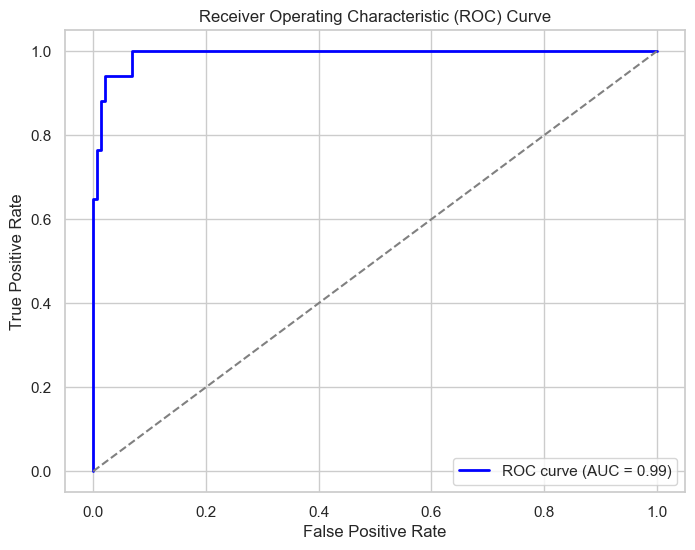

Accuracy: 0.9695121951219512
Precision: 0.9686933797909408
Recall: 0.9695121951219512
F1 Score: 0.9681909575693997
AUC-ROC: 0.9923969587835135


In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create the preprocessing pipeline including Random Forest classifier
rf_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

### K-Nearest Neighbor(KNN) Classifier

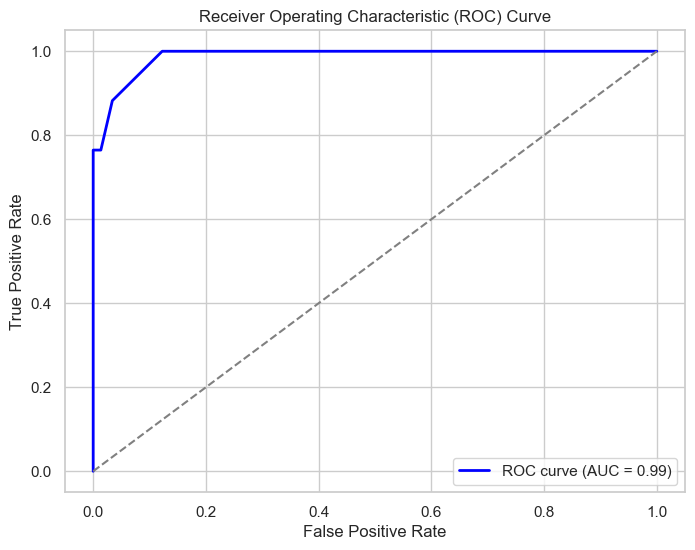

Accuracy: 0.975609756097561
Precision: 0.9762558552737846
Recall: 0.975609756097561
F1 Score: 0.9741474327494952
AUC-ROC: 0.9879951980792316


In [185]:
from sklearn.neighbors import KNeighborsClassifier


# Create the preprocessing pipeline including KNN classifier
knn_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=10))])

knn_classifier.fit(X_train, y_train)

# Predictions
y_pred = knn_classifier.predict(X_test)
y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

#### Comparison of various classifiers based on different performance metrics:

1. Logistic Regression:
        Accuracy:0.896,
        Precision:0.896,
        Recall:1.000,
        F1 Score:0.945,
        AUC-ROC:0.900
        
2. Decision Tree Classifier:
        Accuracy:0.957,
        Precision:0.970,
        Recall:0.957,
        F1 Score:0.960,
        AUC-ROC:0.976

3. Random Forest Classifier:
        Accuracy:0.957,
        Precision:0.955,
        Recall:0.957,
        F1 Score:0.955,
        AUC-ROC:0.974

4. K-NN Classifier:
        Accuracy:0.976,
        Precision:0.976,
        Recall:0.976,
        F1 Score:0.974,
        AUC-ROC:0.988

Based on these metrics:

- K-NN Classifier performs the best overall, with the highest accuracy, precision, recall, F1 score, and AUC-ROC score.
- Random Forest Classifier also performs well, with high scores across all metrics, except slightly lower than K-NN in terms of accuracy and AUC-ROC.
- Logistic Regression has a lower accuracy compared to other classifiers, but it still achieves high precision, recall, and AUC-ROC.
- Decision Tree Classifier performs well overall but has slightly lower precision compared to K-NN and Random Forest.


### Testing Top Classifiers 

Top classifiers found so far are: `k-NN Classifier`, `Random Forest Classifier`, `Logistic Regressor`.

Firstly, let's get the test set.

In [186]:
# Splitting the data into training and testing sets
X_test = thermo_data_test.drop(['aveOralF', 'aveOralM', 'fever_aveOralF', 'fever_aveOralM'], axis=1)  # Features
y_test = thermo_data_test['fever_aveOralM']  # Target for aveOralM fever classification

#### Testing Logistic Regression

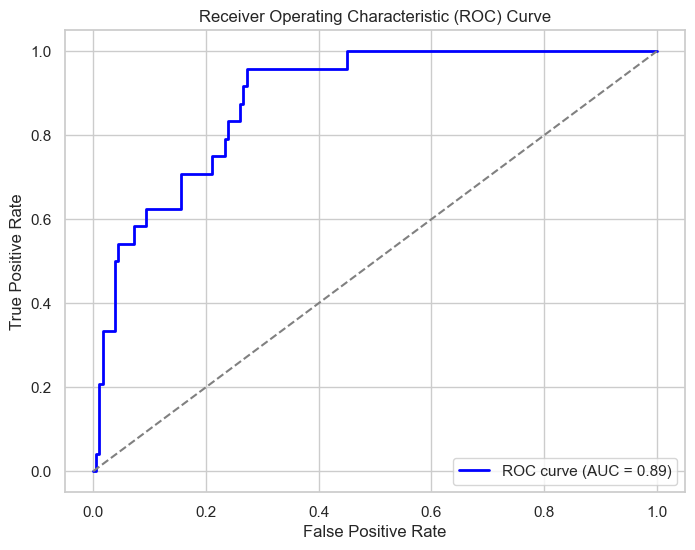

Accuracy: 0.8774509803921569
Precision: 0.7780353520718633
Recall: 0.8774509803921569
F1 Score: 0.82475810167409
AUC-ROC: 0.8870370370370371


In [187]:
# Make predictions
y_pred = lr_classifier.predict(X_test)
y_pred_proba = lr_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

#### Testing Random Forest Classifier

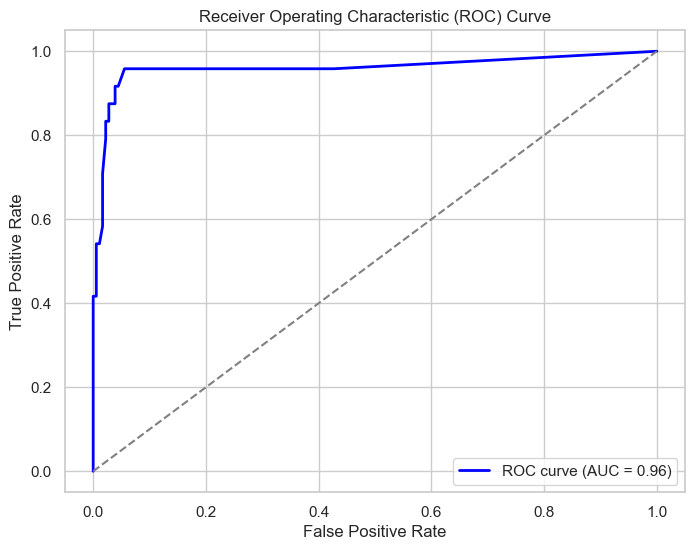

Accuracy: 0.9607843137254902
Precision: 0.9607843137254902
Recall: 0.9607843137254902
F1 Score: 0.9607843137254902
AUC-ROC: 0.9594907407407407


In [188]:
# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

#### Testing K-NN Classifier

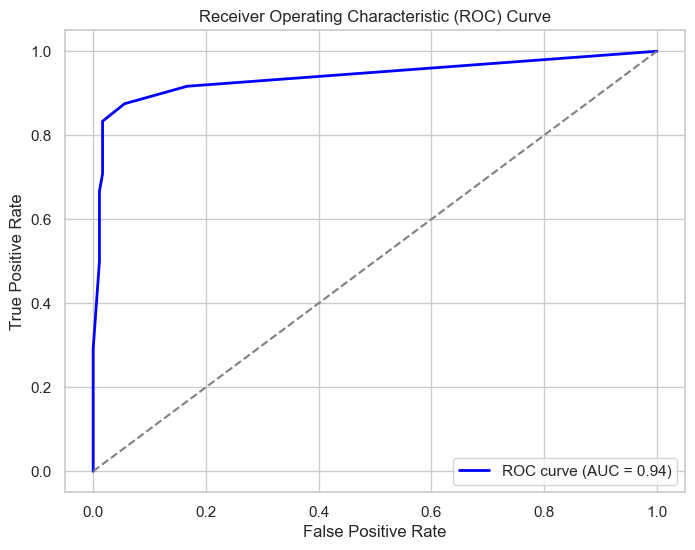

Accuracy: 0.9509803921568627
Precision: 0.9487851662404093
Recall: 0.9509803921568627
F1 Score: 0.9490215666686256
AUC-ROC: 0.9395833333333332


In [189]:
# Make predictions
y_pred = knn_classifier.predict(X_test)
y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]  # Probability of being in positive class

performance_metrics_val_and_graph(y_test, y_pred, y_pred_proba)

#### Performance Metrics of Classifiers for Training Set:

    K-NN Classifier: Accuracy:0.976, Precision:0.976, Recall:0.976, F1 Score:0.974, AUC-ROC:0.988
    
    Random Forest Classifier: Accuracy:0.957, Precision:0.955, Recall:0.957, F1 Score:0.955, AUC-ROC:0.974
    
    Logistic Regression: Accuracy:0.896, Precision:0.896, Recall:1.000, F1 Score:0.945, AUC-ROC:0.900


#### Performance Metrics of Classifiers for Testing Set:
    
    K-NN Classifier: Accuracy:0.951, Precision:0.949, Recall:0.951, F1 Score:0.949, AUC-ROC:0.940
    
    Random Forest Classifier: Accuracy:0.961, Precision:0.961, Recall:0.961, F1 Score:0.961, AUC-ROC:0.959
    
    Logistic Regression: Accuracy:0.877, Precision:0.778, Recall:0.877, F1 Score:0.825, AUC-ROC:0.887

<br></br>

We can observe that performance of `k-NN_Classifier` remains pretty much the same for both training and testing set, while performance of `Logistic_Regression` and `Random_Forest_Classifier` decreases.

## References

1. Wang, Q., Zhou, Y., Ghassemi, P., McBride, D., Casamento, J.P., & Pfefer, T.J. (2021). Infrared Thermography for Measuring Elevated Body Temperature: Clinical Accuracy, Calibration, and Evaluation. Sensors (Basel, Switzerland), 22.
<br>
2. Wang, Q., Zhou, Y., Ghassemi, P., Chenna, D., Chen, M., Casamento, J., Pfefer, J., & Mcbride, D. (2023). Facial and oral temperature data from a large set of human subject volunteers (version 1.0.0). PhysioNet. https://doi.org/10.13026/3bhc-9065.
3. Aurélien Géron, E. (2022). Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. O'Reilly Media Press